# Homework 3, Problem 4
The goal of this problem is for you to try and classify whether or not an individual is likely to make more or less than 50K per year. Carry out this task. Try at least five general architectures, report precision, recall and f1 score on a test set.

For each of the parts, report your preformance in terms not of just numbers but in terms of graphs. When you have training and validation data, please show the curves as the training progresses. You should know when you are overfitting or underfitting. Don't just report bare numbers. You are free to add implmentation or markdown cells to make your notebook clearer!!

Data:
The following dataset was taken from the first dataset repository: http://archive.ics.uci.edu/ml/datasets/Adult

As the original task of the dataset lays out, Please note:

the continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents.
Part 1: Dealing with Missing Values
What should you do about dealing with missing values - do you just drop those rows?
One of the most common problems we come accross in working with data "in the wild" is missing data. Often we will have observations (rows) that have only some of the needed attributes. Different rows will have different attributes missing. There are a number of strategies for dealing with the missing values. Clearly one could be dropping the column (attribute), or row (observation). Unfortuntely if you drop columns you may lose critical information that is helpful for classification and may be present in most (many) of the rows. You can drop rows but if many rows have at least one missing value, you may loose too much data. Do you try to impute (i. e. fill in) the missing data? If so how?

Explain why you chose the strategy you did.

Hint - '?' denotes a missing value.

Some possible strategies for dealing with missing data
Whenever there is pleanty of data and very little missing data, you should consider dropping rows and/or columns. This may introduce some bias in the data but again, if the problem is limited to a very few rows or columns, it is easy in training to reproduce.

Fill with fixed value using sklearn.impute.SimpleImputer. a. 'constant' 0. Rarely a good idea but sometimes, if we can assume that when it is missing it is basically 0, this might be a good idea. For example a data may list number of house fires in a zip code and a missing value just means none. b. 'mean' if the data is numeric, the mean is meaningfull. c. 'median' may be more sensible if the data is integer or ordered. When the mean and median are very different it is important to understand what a "typical" example might mean. When considering "income", for example, a few large outliers will mess up the mean. d. "most_frequent' when you have categorical (nominal) labels, mean and median don't make any sense. Most probable label is what you need to use. This is also known as "mode".

sklearn.impute.MissingIndicator: Sometimes the fact that a value is missing, is itself an important indicator. One can create a new feature/attribute that indicates a certain attribute is missing. If you later build a classifier by hand you can explicitly wieght each variable using the missing variable weights so that for that example (row) that attribute won't contribute to the classifier. In a deep neural network it is possible that the network can learn to do that automatically.

One can use the sklearn.impute.KNNImputer which will look for rows to fill in the data.

Fill with sklearn.impute.IterativeImputer scikit-learn provides a sophisticated imputation strategy. You can read up on this in the documentation, but it will fix on of the columns (attributes), and try to use the other features to predict similar to KNN but more sophisticated.

Train a classifier: You can build your own classifier using machine learning. This is kind of a problem within a problem but if done correctly, it has the potential to be more accurate than a simpler method. Of course, if done badly it could be worse.

Manually impute the missing values. You may know enough about the problem to build an ad-hoc way to fill in the missing values for each column in a way that makes the most sense. This almost always requires a great deal of domain expertise.

In [42]:
import pandas as pd
import numpy as np

def Printthis(df ,idx=False ,elems=5 ,rows=10 ,columns=None ,rand=False ,prtall=False):
    if prtall == True:
        with pd.option_context('display.max_rows', None
                               , 'display.max_columns', None
                               ,'display.width', None
                              ,'display.max_colwidth', None):
            print (df)
    else:
        size = len(df)

        if idx==True:
            return idxex
        elif rand == False:
            with pd.option_context('display.max_rows', rows
                                   , 'display.max_columns', columns
                                   ,'display.width', None
                                  ,'display.max_colwidth', None):
                print (df.iloc[:rows])
        else:
            index = np.random.permutation(size)[:elems]
            with pd.option_context('display.max_rows', rows
                                   , 'display.max_columns', columns
                                   ,'display.width', None
                                  ,'display.max_colwidth', None):
                print (df.iloc[index])

#### Add your code for filling in the data here. Please end by using the appropriate pandas method
#### to show the amount of missing data (which in the end should not be any since you dropped or filled in data)

In [43]:

columns = [
    "age",
    "work_class",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "target"
]
df = pd.read_csv("/mnt/hgfs/VMsharedFolder/CCNY/csci1910/hw4/adult.data", names=columns)
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = df[column].str.strip()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work_class      32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [45]:
df.shape

(32561, 15)

In [46]:
for col in df:
    print(col)
    Printthis(df[col].unique() ,prtall=True)

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
work_class
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education_num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital_status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective

In [47]:
for col in df:
    print(col)
    Printthis(df[col].value_counts() ,prtall=True)

age
36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
51    595
49    577
18    550
48    543
52    478
53    464
55    419
54    415
17    395
58    366
56    366
57    358
59    355
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: age, dtype: int64
work_class
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked           

In [48]:
for col in df[['work_class','occupation']]:
    print(col)
    Printthis(df[col].value_counts() ,prtall=True)

work_class
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: work_class, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


In [49]:
len(df[(df['work_class']=='?') | (df['native_country']=='?')])/len(df)

0.073462117256841

In [50]:
rows=50
Printthis(df[(df['work_class']=='?') | (df['native_country']=='?')] ,rand=True ,elems=rows ,rows=rows)

       age        work_class  fnlwgt     education  education_num  \
30707   27                 ?  146651       HS-grad              9   
24714   18                 ?  172214       HS-grad              9   
20658   36           Private  218948           9th              5   
15036   55           Private  158702  Some-college             10   
21487   48                 ?  355890     Bachelors             13   
24813   73                 ?  135601     Bachelors             13   
22230   44           Private  228729       HS-grad              9   
5526    20                 ?  201680  Some-college             10   
3990    77                 ?  147284       HS-grad              9   
20963   24                 ?  154373       HS-grad              9   
13302   27                 ?  175552       5th-6th              3   
27513   46                 ?  228620          11th              7   
5823    38  Self-emp-not-inc  414991       HS-grad              9   
28937   46           Private  2680

In [51]:
Printthis(df.groupby(['work_class', 'education']).size() ,prtall=True)

work_class        education   
?                 10th             100
                  11th             118
                  12th              40
                  1st-4th           12
                  5th-6th           30
                  7th-8th           72
                  9th               51
                  Assoc-acdm        47
                  Assoc-voc         61
                  Bachelors        173
                  Doctorate         15
                  HS-grad          532
                  Masters           48
                  Preschool          5
                  Prof-school       18
                  Some-college     514
Federal-gov       10th               6
                  11th               9
                  12th               5
                  5th-6th            1
                  7th-8th            2
                  9th                3
                  Assoc-acdm        55
                  Assoc-voc         38
                  Bachelors      

In [52]:
Printthis(df[df['work_class']=='?'].groupby(['education', 'work_class']).size() ,prtall=True)

education     work_class
10th          ?             100
11th          ?             118
12th          ?              40
1st-4th       ?              12
5th-6th       ?              30
7th-8th       ?              72
9th           ?              51
Assoc-acdm    ?              47
Assoc-voc     ?              61
Bachelors     ?             173
Doctorate     ?              15
HS-grad       ?             532
Masters       ?              48
Preschool     ?               5
Prof-school   ?              18
Some-college  ?             514
dtype: int64


In [53]:
Printthis(df[df['work_class']=='?'].groupby(['age']).size() ,prtall=True)

age
17     64
18     92
19    113
20    115
21     89
22     79
23     46
24     34
25     32
26     22
27     33
28     41
29     28
30     28
31     19
32     25
33     26
34     26
35     32
36     23
37      9
38     17
39     12
40     17
41     18
42     15
43     13
44     10
45     11
46     11
47     14
48     16
49     18
50     14
51     17
52     14
53     12
54     16
55     22
56     13
57     16
58     20
59     20
60     31
61     36
62     42
63     39
64     31
65     39
66     37
67     39
68     28
69     28
70     24
71     18
72     25
73     15
74     12
75     11
76     16
77      9
78      9
79      7
80      6
81      6
82      5
83      1
84      2
87      1
90      7
dtype: int64


In [54]:
Printthis(df[df['work_class']!='?'].groupby(['education']).size() ,prtall=True)

education
10th             833
11th            1057
12th             393
1st-4th          156
5th-6th          303
7th-8th          574
9th              463
Assoc-acdm      1020
Assoc-voc       1321
Bachelors       5182
Doctorate        398
HS-grad         9969
Masters         1675
Preschool         46
Prof-school      558
Some-college    6777
dtype: int64


In [55]:
Printthis(df[df['work_class']!='?'].groupby(['age']).size() ,prtall=True)

age
17    331
18    458
19    599
20    638
21    631
22    686
23    831
24    764
25    809
26    763
27    802
28    826
29    785
30    833
31    869
32    803
33    849
34    860
35    844
36    875
37    849
38    810
39    804
40    777
41    790
42    765
43    757
44    714
45    723
46    726
47    694
48    527
49    559
50    588
51    578
52    464
53    452
54    399
55    397
56    353
57    342
58    346
59    335
60    281
61    264
62    216
63    191
64    177
65    139
66    113
67    112
68     92
69     80
70     65
71     54
72     42
73     49
74     39
75     34
76     30
77     20
78     14
79     15
80     16
81     14
82      7
83      5
84      8
85      3
86      1
88      3
90     36
dtype: int64


#### Since the combined missing data (?) is less than 10% of the size of the dataset, it can be dropped. 
Otherwise, the IterativeImputer seems like a viable solution since the '?' values do not have an easily
inspected relation to the other columns.

In [56]:
df_imputed = df[(df['work_class']!='?') & (df['native_country']!='?')].copy()

# Part 2: Train Test Validate Split
Ideally you will split the data and use the train data filling in proceedure for the test data. Because this is expensive you can do experiments initially to see if this matters. Just keep carefully in mind what you will know and what you can't know during the test evaluation. Both sklearn and tensorflow provide facilities for train test split. Take your pick.

At the end of this you should have a train, validate and test split. In the next part you are going to do preliminary testing of your model with your train+validation sets to get some idea of good canditates for hyperparameters. Later you will merge your training and validation set and resplit them up using cross validation to get better estimates for setting hyper-parameters

NOTE: It is very important that you record very carefully any parameters you have for filling in data in step 1. For example if you you build a "fit" using some training data, later you will need to use the this "fit" to transform the data, you can not re-fit on new data. In other words if your "pipline" in training takes the mean of the input to fill in the first column, you need to fill with exactly that number, when you get new data for testing. Don't take the mean of the test data.

In [57]:
from sklearn.model_selection import StratifiedShuffleSplit
import math

In [58]:
df_imputed.head()

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data setup/inspection:

In [59]:
df_imputed['target'] = (df_imputed['target']=='<=50K').astype(int)

In [60]:
#df_dtyped.loc[:,'target'] = df_imputed['target']!='<=50K'
#df_dtyped.loc[:,'sex'] = df_imputed['target']!='<=50K'
df_dtyped =  df_imputed[df_imputed.columns[df.columns!='education']].astype(
    {'work_class':'category','marital_status':'category', 'occupation':'category'
     ,'relationship':'category', 'race':'category', 'sex':'category'
    ,'native_country':'category','age':'int64', 'fnlwgt':'int64', 'education_num':'category',       
       'capital_gain':'int64', 'capital_loss':'int64', 'hours_per_week':'int64','target':'int64'}
    )

In [61]:
df_large_counts = df_dtyped.groupby(column).filter(lambda x: len(x) > 1)

#i=0
#while i < 2*len(df_dtyped.columns):
for column in df_large_counts:
    df_large_counts = df_large_counts.groupby(column).filter(lambda x: len(x) > 1)
#i=i+1

In [62]:
X = df_large_counts[df_large_counts.columns[df_large_counts.columns!='target']]
y = df_large_counts['target']

print(X.shape)
print(y.shape)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)
for train_index, test_val_index in split.split(X, X["native_country"]):                               
    train_set = X.iloc[train_index]    
    y_train = y.iloc[train_index]
    
    test_val_set = X.iloc[test_val_index]    
    test_val_y = y.iloc[test_val_index]

print('\n' ,train_set.shape)
print(y_train.shape)
print(test_val_set.shape)
print(test_val_y.shape)

(15673, 13)
(15673,)

 (9403, 13)
(9403,)
(6270, 13)
(6270,)


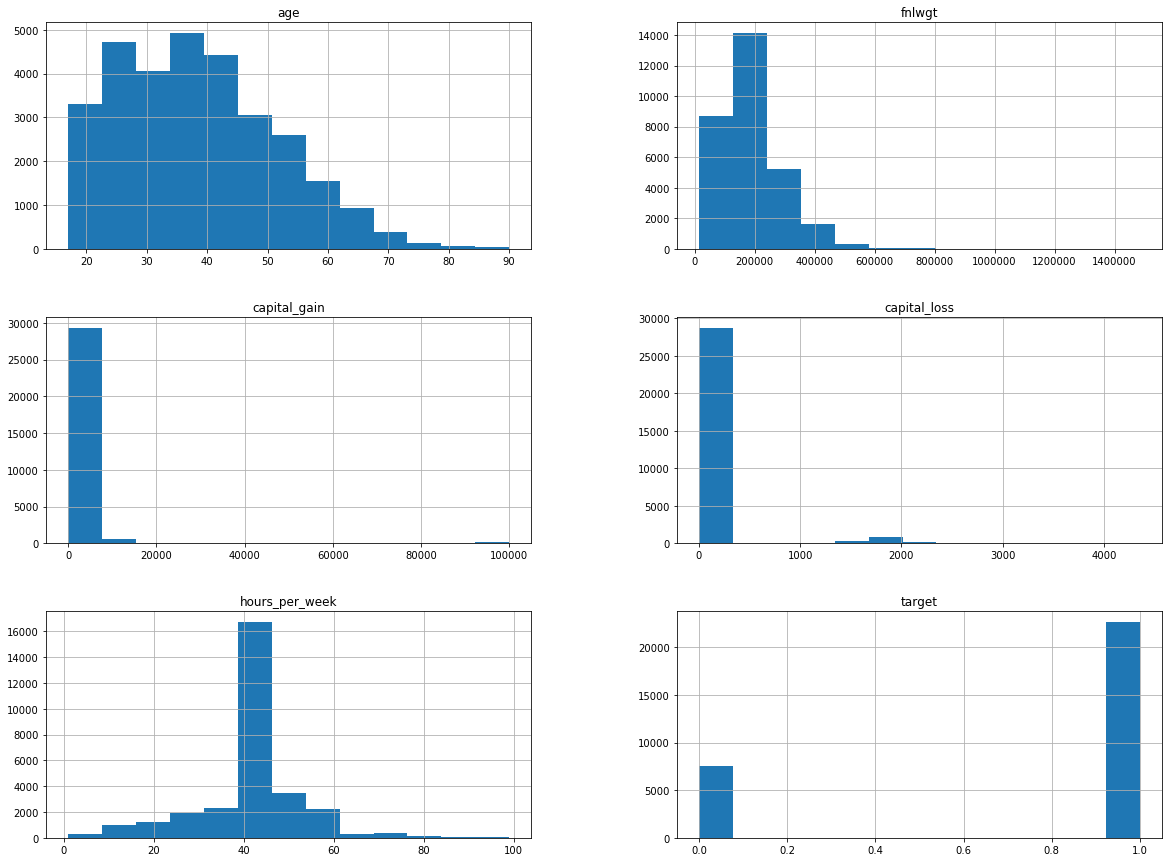

In [63]:
%matplotlib inline 
#only in a jupyter notebook
import matplotlib.pyplot as plt
bins = len(test_val_set.columns)
df_dtyped.hist(bins=bins, figsize=(20,15))
plt.show()

In [64]:
import seaborn as sns

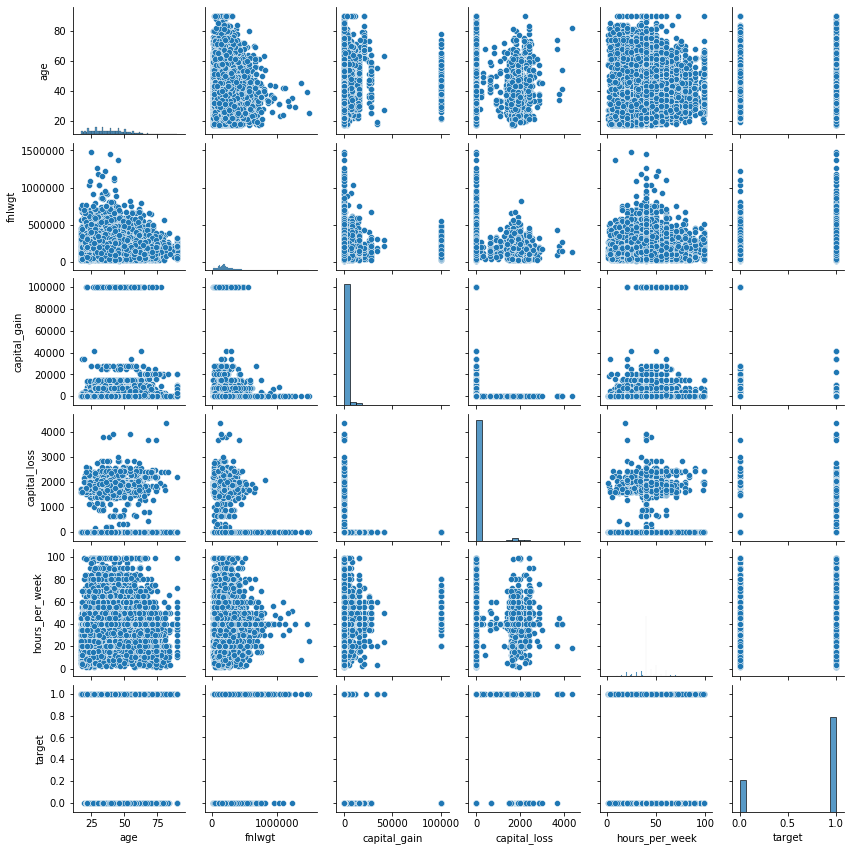

In [65]:
sns.pairplot(df_dtyped ,height=2 ,aspect=1)

### Set up your models here
#### Get baseline results here with logisic regression and random forest

In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [67]:
from sklearn.base import BaseEstimator, TransformerMixin
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [68]:
try:
    del nums
except NameError:
    pass
try:
    del onehot
except NameError:
    pass
try:
    del ordinal
except NameError:
    pass
    
nums = ['age', 'fnlwgt' ,'capital_gain', 'capital_loss', 'hours_per_week']
onehot = [#'education_num',
          'work_class','marital_status', 'occupation', 'relationship', 'race', 'sex','native_country']
ordinal = ['education_num']

In [69]:
from sklearn.impute import SimpleImputer

print(train_set.shape)
print(test_val_set.shape)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
   #     ('imputer' ,MostFrequentImputer()),
        ('cat_encoder' ,OneHotEncoder(sparse=False)),
    ])

ord_pipeline = Pipeline([
        ('ordinal' ,OrdinalEncoder())
    ])

full_pipeline = ColumnTransformer([
    ('num' ,num_pipeline ,nums),
    ('cat' ,cat_pipeline ,onehot),
    ('ord' ,ord_pipeline ,ordinal),
    ],
    remainder='drop'
)

test_size = math.floor(len(test_val_set)/2)
x_train = full_pipeline.fit_transform(train_set)
x_test = full_pipeline.fit_transform(test_val_set[:test_size])
x_val = full_pipeline.fit_transform(test_val_set[test_size:])

y_test = test_val_y[:test_size]
y_val = test_val_y[test_size:]

print('\n' ,x_train.shape)
print(x_test.shape)
print(y_test.shape)

print(x_val.shape)
print(y_val.shape)


(9403, 13)
(6270, 13)

 (9403, 89)
(3135, 86)
(3135,)
(3135, 86)
(3135,)


##### for some reason the number of columns do not match up after transformation

In [70]:
x_train = x_train[:,:min(x_train.shape[1],x_test.shape[1],x_val.shape[1])]
x_test = x_test[:,:min(x_train.shape[1],x_test.shape[1],x_val.shape[1])]
x_val = x_val[:,:min(x_train.shape[1],x_test.shape[1],x_val.shape[1])]

print('\n' ,x_train.shape)
print(x_test.shape)
print(x_val.shape)


 (9403, 86)
(3135, 86)
(3135, 86)


# Part 3: Build different 2 sklearn models and five different variations of Keras/tensorflow models
Two simple models should be baseline from sklearn. Try a logistic regression and a random forest to know what your dense neural network should be able to beat. Use the training and validation data from above (don't look at the testing data). Try varations on the number of notes in a layer, the number of layers. Also play with feature selection. You can try to eliminate featuers and see if your validation score goes up or down. See how the batch size effects things.

At the end of this section provide a report with figures on your conclusion on how these things effected preformance:
number of hidden layers
number of nodes per hidden layer aka matrix dimension
activation function
weight initialization
metrics for evaluation
batch size
number of epochs
optimizer
also carry out feature selection / dimensionality reduction
does the model do better or worse with dimensionality reduction?
* Note: do not try regularization yet!

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [72]:
log_reg = LogisticRegression(max_iter=1000 ,random_state=42)
log_reg.fit(x_train ,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
y_pred = log_reg.predict(x_test)
accuracy_score(y_test, y_pred)

0.49856459330143543

In [74]:
y_pred = log_reg.predict(x_val)
accuracy_score(y_test, y_pred)

0.389792663476874

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(x_train ,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [77]:
y_pred = rand_forest.predict(x_test)
accuracy_score(y_test, y_pred)

0.7352472089314195

In [78]:
y_pred = rand_forest.predict(x_val)
accuracy_score(y_test, y_pred)

0.6880382775119617

# Defining Models:

In [79]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras import backend as K

In [80]:
y_train_bool = y_train
y_test_bool = y_test
y_val_bool = y_val

In [81]:
def model_one():
    tf.keras.backend.clear_session()
    model1 = Sequential()
    model1.add(Dense(40 ,input_shape=(86,) ,activation='sigmoid'))
    model1.add(Dense(1 ,activation='sigmoid'))
    model1.compile(optimizer='sgd' ,loss='binary_crossentropy' ,metrics=['accuracy'])
    K.set_value(model1.optimizer.learning_rate, .3)
    model1.summary()
    
    return model1
    
#decreasing output node amount
def model_two():
    tf.keras.backend.clear_session()
    model1 = Sequential()
    model1.add(Dense(20 ,input_shape=(86,) ,activation='sigmoid'))
    model1.add(Dense(1 ,activation='sigmoid'))
    model1.compile(optimizer='sgd' ,loss='binary_crossentropy' ,metrics=['accuracy'])
    K.set_value(model1.optimizer.learning_rate, .3)
    model1.summary()
    
    return model1    

#changing activation function
def model_three(): 
    tf.keras.backend.clear_session()
    model1 = Sequential()
    model1.add(Dense(40 ,input_shape=(86,) ,activation='relu'))
    model1.add(Dense(1 ,activation='relu'))
    model1.compile(optimizer='sgd' ,loss='binary_crossentropy' ,metrics=['accuracy'])
    K.set_value(model1.optimizer.learning_rate, .3)
    model1.summary()

    return model1

#added hidden layer
def model_four():   
    tf.keras.backend.clear_session()
    model1 = Sequential()
    model1.add(Dense(40 ,input_shape=(86,) ,activation='sigmoid'))
    model1.add(Dense(10 ,input_shape=(20,) ,activation='sigmoid'))
    model1.add(Dense(1 ,activation='sigmoid'))
    model1.compile(optimizer='sgd' ,loss='binary_crossentropy' ,metrics=['accuracy'])
    K.set_value(model1.optimizer.learning_rate, .3)
    model1.summary()

    return model1

#added dropout
def model_five():
    tf.keras.backend.clear_session()
    model1 = Sequential()
    model1.add(Dense(40 ,input_shape=(86,) ,activation='sigmoid'))
    model1.add(Dropout(0.2))
    model1.add(Dense(1 ,activation='sigmoid'))
    model1.compile(optimizer='adam' ,loss='binary_crossentropy' ,metrics=['accuracy'])
    K.set_value(model1.optimizer.learning_rate, .3)
    model1.summary()

    return model1

# Perform preliminary evaluations here

# Model 1:

In [82]:
try:
    del history
except:
    pass
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss'
                                                  ,patience=200
                                                  ,min_delta = 0.05, verbose = 1)
model1 = model_one()
history = model1.fit(x_train ,y_train_bool ,epochs = 1000 ,validation_data=(x_val, y_val_bool)
              ,batch_size=1000 ,callbacks = [early_stopping])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                3480      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
10/10 [==============================] - 1s 34ms/step - loss: 0.6435 - accuracy: 0.6652 - val_loss: 0.6071 - val_accuracy: 0.7085
Epoch 2/1000
10/10 [==============================] - 0s 17ms/step - loss: 0.5998 - accuracy: 0.7033 - val_loss: 0.5947 - val_accuracy: 0.7085
Epoch 3/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5682 - accuracy: 0.7100 - val_loss: 0.5861 - val_accuracy: 0.7085
Epoch 4/1000
10/10 [==============================] - 0s 17ms/step - loss: 0.5448 - acc

Epoch 54/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3832 - accuracy: 0.8174 - val_loss: 0.5238 - val_accuracy: 0.7445
Epoch 55/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.3762 - accuracy: 0.8203 - val_loss: 0.5234 - val_accuracy: 0.7429
Epoch 56/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3793 - accuracy: 0.8171 - val_loss: 0.5246 - val_accuracy: 0.7429
Epoch 57/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3871 - accuracy: 0.8154 - val_loss: 0.5228 - val_accuracy: 0.7455
Epoch 58/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.3817 - accuracy: 0.8201 - val_loss: 0.5229 - val_accuracy: 0.7435
Epoch 59/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.3808 - accuracy: 0.8203 - val_loss: 0.5227 - val_accuracy: 0.7432
Epoch 60/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.3842 - accuracy: 0.8155 - val_loss: 0.5222 - val_accuracy:

Epoch 111/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.3762 - accuracy: 0.8180 - val_loss: 0.5074 - val_accuracy: 0.7534
Epoch 112/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.3738 - accuracy: 0.8182 - val_loss: 0.5102 - val_accuracy: 0.7435
Epoch 113/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.3748 - accuracy: 0.8233 - val_loss: 0.5071 - val_accuracy: 0.7496
Epoch 114/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3687 - accuracy: 0.8242 - val_loss: 0.5103 - val_accuracy: 0.7435
Epoch 115/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3703 - accuracy: 0.8248 - val_loss: 0.5063 - val_accuracy: 0.7531
Epoch 116/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.3722 - accuracy: 0.8238 - val_loss: 0.5089 - val_accuracy: 0.7439
Epoch 117/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3731 - accuracy: 0.8226 - val_loss: 0.5140 - val_ac

10/10 [==============================] - 0s 14ms/step - loss: 0.3722 - accuracy: 0.8227 - val_loss: 0.5031 - val_accuracy: 0.7477
Epoch 168/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3706 - accuracy: 0.8222 - val_loss: 0.4964 - val_accuracy: 0.7512
Epoch 169/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3701 - accuracy: 0.8214 - val_loss: 0.5058 - val_accuracy: 0.7400
Epoch 170/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3705 - accuracy: 0.8228 - val_loss: 0.4944 - val_accuracy: 0.7553
Epoch 171/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.3710 - accuracy: 0.8228 - val_loss: 0.5009 - val_accuracy: 0.7483
Epoch 172/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3715 - accuracy: 0.8239 - val_loss: 0.5002 - val_accuracy: 0.7496
Epoch 173/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3694 - accuracy: 0.8232 - val_loss: 0.4975 - val_accuracy: 0.7480


10/10 [==============================] - 0s 14ms/step - loss: 0.3729 - accuracy: 0.8206 - val_loss: 0.4925 - val_accuracy: 0.7534
Epoch 224/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.3674 - accuracy: 0.8277 - val_loss: 0.4943 - val_accuracy: 0.7490
Epoch 225/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3659 - accuracy: 0.8278 - val_loss: 0.4915 - val_accuracy: 0.7515
Epoch 226/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3626 - accuracy: 0.8270 - val_loss: 0.4963 - val_accuracy: 0.7448
Epoch 227/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3705 - accuracy: 0.8212 - val_loss: 0.4870 - val_accuracy: 0.7643
Epoch 228/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3628 - accuracy: 0.8288 - val_loss: 0.4967 - val_accuracy: 0.7435
Epoch 229/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.3705 - accuracy: 0.8236 - val_loss: 0.4902 - val_accuracy: 0.7515


10/10 [==============================] - 0s 14ms/step - loss: 0.3641 - accuracy: 0.8274 - val_loss: 0.4901 - val_accuracy: 0.7455
Epoch 280/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3643 - accuracy: 0.8275 - val_loss: 0.4835 - val_accuracy: 0.7617
Epoch 281/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3628 - accuracy: 0.8285 - val_loss: 0.5059 - val_accuracy: 0.7219
Epoch 282/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3645 - accuracy: 0.8333 - val_loss: 0.5019 - val_accuracy: 0.7305
Epoch 283/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.3659 - accuracy: 0.8276 - val_loss: 0.4881 - val_accuracy: 0.7502
Epoch 284/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.3639 - accuracy: 0.8267 - val_loss: 0.4911 - val_accuracy: 0.7442
Epoch 285/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3673 - accuracy: 0.8250 - val_loss: 0.5039 - val_accuracy: 0.7263


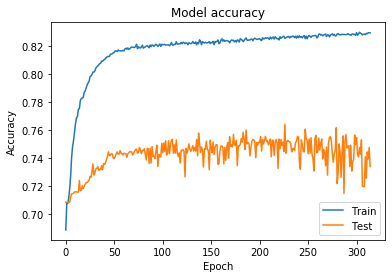

In [83]:
#Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [84]:
model1.evaluate(x_val ,y_val_bool)

98/98 [==============================] - 0s 3ms/step - loss: 0.4954 - accuracy: 0.7340


[0.4953840970993042, 0.7339712977409363]

# Model 2:

In [85]:
try:
    del history
except:
    pass
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss'
                                                  ,patience=200
                                                  ,min_delta = 0.05, verbose = 1)
model2 = model_two()
history = model2.fit(x_train ,y_train_bool ,epochs = 1000 ,validation_data=(x_val, y_val_bool)
              ,batch_size=1000 ,callbacks = [early_stopping])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                1740      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
10/10 [==============================] - 1s 30ms/step - loss: 0.6050 - accuracy: 0.7056 - val_loss: 0.5817 - val_accuracy: 0.7085
Epoch 2/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.5667 - accuracy: 0.7129 - val_loss: 0.5713 - val_accuracy: 0.7104
Epoch 3/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.5464 - accuracy: 0.7105 - val_loss: 0.5604 - val_accuracy: 0.7136
Epoch 4/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.5194 - acc

Epoch 54/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3818 - accuracy: 0.8174 - val_loss: 0.4980 - val_accuracy: 0.7547
Epoch 55/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.3868 - accuracy: 0.8174 - val_loss: 0.4981 - val_accuracy: 0.7550
Epoch 56/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.3871 - accuracy: 0.8150 - val_loss: 0.4976 - val_accuracy: 0.7518
Epoch 57/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3843 - accuracy: 0.8141 - val_loss: 0.4971 - val_accuracy: 0.7547
Epoch 58/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.3810 - accuracy: 0.8175 - val_loss: 0.4968 - val_accuracy: 0.7547
Epoch 59/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.3816 - accuracy: 0.8173 - val_loss: 0.4965 - val_accuracy: 0.7547
Epoch 60/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3820 - accuracy: 0.8199 - val_loss: 0.4965 - val_accuracy:

Epoch 111/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3735 - accuracy: 0.8240 - val_loss: 0.4824 - val_accuracy: 0.7604
Epoch 112/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3694 - accuracy: 0.8231 - val_loss: 0.4823 - val_accuracy: 0.7604
Epoch 113/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3665 - accuracy: 0.8248 - val_loss: 0.4821 - val_accuracy: 0.7595
Epoch 114/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3740 - accuracy: 0.8196 - val_loss: 0.4819 - val_accuracy: 0.7624
Epoch 115/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.3766 - accuracy: 0.8169 - val_loss: 0.4848 - val_accuracy: 0.7569
Epoch 116/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.3780 - accuracy: 0.8180 - val_loss: 0.4812 - val_accuracy: 0.7598
Epoch 117/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3838 - accuracy: 0.8154 - val_loss: 0.4824 - val_ac

10/10 [==============================] - 0s 12ms/step - loss: 0.3645 - accuracy: 0.8258 - val_loss: 0.4746 - val_accuracy: 0.7566
Epoch 168/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3670 - accuracy: 0.8257 - val_loss: 0.4735 - val_accuracy: 0.7595
Epoch 169/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.3671 - accuracy: 0.8250 - val_loss: 0.4750 - val_accuracy: 0.7525
Epoch 170/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3671 - accuracy: 0.8261 - val_loss: 0.4727 - val_accuracy: 0.7598
Epoch 171/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3731 - accuracy: 0.8203 - val_loss: 0.4720 - val_accuracy: 0.7627
Epoch 172/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3676 - accuracy: 0.8247 - val_loss: 0.4741 - val_accuracy: 0.7528
Epoch 173/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3661 - accuracy: 0.8275 - val_loss: 0.4748 - val_accuracy: 0.7509


10/10 [==============================] - 0s 14ms/step - loss: 0.3665 - accuracy: 0.8212 - val_loss: 0.4699 - val_accuracy: 0.7633
Epoch 224/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3634 - accuracy: 0.8253 - val_loss: 0.4699 - val_accuracy: 0.7595
Epoch 225/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3607 - accuracy: 0.8278 - val_loss: 0.4701 - val_accuracy: 0.7640
Epoch 226/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.3668 - accuracy: 0.8294 - val_loss: 0.4699 - val_accuracy: 0.7617
Epoch 227/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3630 - accuracy: 0.8273 - val_loss: 0.4699 - val_accuracy: 0.7614
Epoch 228/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3695 - accuracy: 0.8256 - val_loss: 0.4701 - val_accuracy: 0.7652
Epoch 229/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3654 - accuracy: 0.8259 - val_loss: 0.4699 - val_accuracy: 0.7624


10/10 [==============================] - 0s 12ms/step - loss: 0.3590 - accuracy: 0.8300 - val_loss: 0.4709 - val_accuracy: 0.7589
Epoch 280/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3644 - accuracy: 0.8252 - val_loss: 0.4737 - val_accuracy: 0.7595
Epoch 281/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3623 - accuracy: 0.8313 - val_loss: 0.4734 - val_accuracy: 0.7595
Epoch 282/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3651 - accuracy: 0.8280 - val_loss: 0.4728 - val_accuracy: 0.7617
Epoch 283/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.3684 - accuracy: 0.8243 - val_loss: 0.4737 - val_accuracy: 0.7601
Epoch 284/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3687 - accuracy: 0.8239 - val_loss: 0.4729 - val_accuracy: 0.7627
Epoch 285/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.3587 - accuracy: 0.8346 - val_loss: 0.4716 - val_accuracy: 0.7512


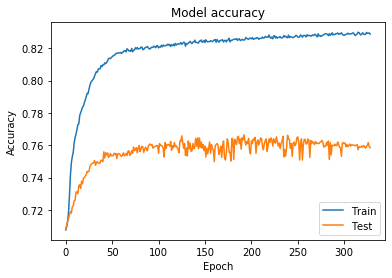

In [86]:
#Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [87]:
model2.evaluate(x_val ,y_val_bool)

98/98 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.7585


[0.47995850443840027, 0.758532702922821]

# Model 3:

In [88]:
try:
    del history
except:
    pass
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss'
                                                  ,patience=200
                                                  ,min_delta = 0.05, verbose = 1)
model3 = model_three()
history = model3.fit(x_train ,y_train_bool ,epochs = 1000 ,validation_data=(x_val, y_val_bool)
              ,batch_size=1000 ,callbacks = [early_stopping])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                3480      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
10/10 [==============================] - 1s 35ms/step - loss: 9.5219 - accuracy: 0.3773 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 2/1000
10/10 [==============================] - 0s 15ms/step - loss: 4.4163 - accuracy: 0.6912 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 3/1000
10/10 [==============================] - 0s 14ms/step - loss: 4.5177 - accuracy: 0.7037 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 4/1000
10/10 [==============================] - 0s 15ms/step - loss: 4.4928 - acc

Epoch 54/1000
10/10 [==============================] - 0s 14ms/step - loss: 4.4261 - accuracy: 0.7097 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 55/1000
10/10 [==============================] - 0s 14ms/step - loss: 4.4143 - accuracy: 0.7105 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 56/1000
10/10 [==============================] - 0s 14ms/step - loss: 4.5383 - accuracy: 0.7024 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 57/1000
10/10 [==============================] - 0s 14ms/step - loss: 4.4004 - accuracy: 0.7114 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 58/1000
10/10 [==============================] - 0s 14ms/step - loss: 4.3492 - accuracy: 0.7148 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 59/1000
10/10 [==============================] - 0s 15ms/step - loss: 4.3751 - accuracy: 0.7131 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 60/1000
10/10 [==============================] - 0s 14ms/step - loss: 4.4704 - accuracy: 0.7068 - val_loss: 4.4459 - val_accuracy:

Epoch 111/1000
10/10 [==============================] - 0s 14ms/step - loss: 4.4066 - accuracy: 0.7110 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 112/1000
10/10 [==============================] - 0s 13ms/step - loss: 4.4162 - accuracy: 0.7104 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 113/1000
10/10 [==============================] - 0s 14ms/step - loss: 4.4670 - accuracy: 0.7071 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 114/1000
10/10 [==============================] - 0s 12ms/step - loss: 4.4296 - accuracy: 0.7095 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 115/1000
10/10 [==============================] - 0s 12ms/step - loss: 4.5166 - accuracy: 0.7038 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 116/1000
10/10 [==============================] - 0s 13ms/step - loss: 4.5688 - accuracy: 0.7004 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 117/1000
10/10 [==============================] - 0s 13ms/step - loss: 4.3606 - accuracy: 0.7140 - val_loss: 4.4459 - val_ac

10/10 [==============================] - 0s 14ms/step - loss: 4.4974 - accuracy: 0.7051 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 168/1000
10/10 [==============================] - 0s 13ms/step - loss: 4.3474 - accuracy: 0.7149 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 169/1000
10/10 [==============================] - 0s 12ms/step - loss: 4.5152 - accuracy: 0.7039 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 170/1000
10/10 [==============================] - 0s 13ms/step - loss: 4.4306 - accuracy: 0.7095 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 171/1000
10/10 [==============================] - 0s 13ms/step - loss: 4.4676 - accuracy: 0.7070 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 172/1000
10/10 [==============================] - 0s 13ms/step - loss: 4.4101 - accuracy: 0.7108 - val_loss: 4.4459 - val_accuracy: 0.7085
Epoch 173/1000
10/10 [==============================] - 0s 14ms/step - loss: 4.4750 - accuracy: 0.7065 - val_loss: 4.4459 - val_accuracy: 0.7085


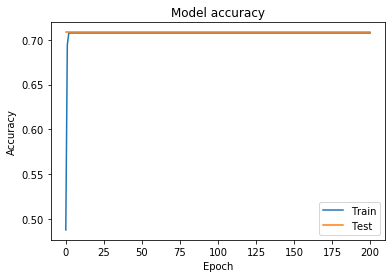

In [89]:
#Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [90]:
model3.evaluate(x_val ,y_val_bool)

98/98 [==============================] - 0s 3ms/step - loss: 4.4459 - accuracy: 0.7085


[4.445871353149414, 0.7084529399871826]

# Model 4:

In [91]:
try:
    del history
except:
    pass
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss'
                                                  ,patience=200
                                                  ,min_delta = 0.05, verbose = 1)
model4 = model_four()
history = model4.fit(x_train ,y_train_bool ,epochs = 1000 ,validation_data=(x_val, y_val_bool)
              ,batch_size=1000 ,callbacks = [early_stopping])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                3480      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                410       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 3,901
Trainable params: 3,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
10/10 [==============================] - 1s 32ms/step - loss: 0.6090 - accuracy: 0.7139 - val_loss: 0.6068 - val_accuracy: 0.7085
Epoch 2/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.6061 - accuracy: 0.7081 - val_loss: 0.6059 - val_accuracy: 0.7085
Epoch 3/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.6076 - accuracy: 0.70

Epoch 53/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4162 - accuracy: 0.7889 - val_loss: 0.5821 - val_accuracy: 0.7187
Epoch 54/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.4126 - accuracy: 0.7975 - val_loss: 0.5772 - val_accuracy: 0.7187
Epoch 55/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4121 - accuracy: 0.7945 - val_loss: 0.5988 - val_accuracy: 0.7183
Epoch 56/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.4094 - accuracy: 0.7943 - val_loss: 0.5893 - val_accuracy: 0.7196
Epoch 57/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.4061 - accuracy: 0.7975 - val_loss: 0.5897 - val_accuracy: 0.7203
Epoch 58/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4037 - accuracy: 0.8001 - val_loss: 0.5921 - val_accuracy: 0.7203
Epoch 59/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4066 - accuracy: 0.7982 - val_loss: 0.5799 - val_accuracy:

Epoch 110/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3742 - accuracy: 0.8193 - val_loss: 0.5081 - val_accuracy: 0.7544
Epoch 111/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3768 - accuracy: 0.8184 - val_loss: 0.5169 - val_accuracy: 0.7512
Epoch 112/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3750 - accuracy: 0.8240 - val_loss: 0.5204 - val_accuracy: 0.7512
Epoch 113/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3822 - accuracy: 0.8162 - val_loss: 0.5190 - val_accuracy: 0.7506
Epoch 114/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3730 - accuracy: 0.8223 - val_loss: 0.5128 - val_accuracy: 0.7534
Epoch 115/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3767 - accuracy: 0.8200 - val_loss: 0.5069 - val_accuracy: 0.7566
Epoch 116/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3729 - accuracy: 0.8213 - val_loss: 0.5140 - val_ac

10/10 [==============================] - 0s 14ms/step - loss: 0.3737 - accuracy: 0.8209 - val_loss: 0.4905 - val_accuracy: 0.7490
Epoch 167/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3701 - accuracy: 0.8229 - val_loss: 0.4851 - val_accuracy: 0.7608
Epoch 168/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3724 - accuracy: 0.8184 - val_loss: 0.4876 - val_accuracy: 0.7576
Epoch 169/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.3677 - accuracy: 0.8247 - val_loss: 0.4999 - val_accuracy: 0.7467
Epoch 170/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3678 - accuracy: 0.8225 - val_loss: 0.4946 - val_accuracy: 0.7486
Epoch 171/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.3708 - accuracy: 0.8232 - val_loss: 0.4916 - val_accuracy: 0.7522
Epoch 172/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3751 - accuracy: 0.8167 - val_loss: 0.4939 - val_accuracy: 0.7486


10/10 [==============================] - 0s 14ms/step - loss: 0.3644 - accuracy: 0.8262 - val_loss: 0.4916 - val_accuracy: 0.7496
Epoch 223/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3652 - accuracy: 0.8269 - val_loss: 0.4822 - val_accuracy: 0.7569
Epoch 224/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3640 - accuracy: 0.8281 - val_loss: 0.5149 - val_accuracy: 0.7324
Epoch 225/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3693 - accuracy: 0.8235 - val_loss: 0.4870 - val_accuracy: 0.7541
Epoch 226/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3685 - accuracy: 0.8253 - val_loss: 0.4861 - val_accuracy: 0.7544
Epoch 227/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3692 - accuracy: 0.8242 - val_loss: 0.4808 - val_accuracy: 0.7579
Epoch 228/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3676 - accuracy: 0.8228 - val_loss: 0.4975 - val_accuracy: 0.7439


10/10 [==============================] - 0s 15ms/step - loss: 0.3565 - accuracy: 0.8314 - val_loss: 0.5404 - val_accuracy: 0.6982
Epoch 279/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.3646 - accuracy: 0.8258 - val_loss: 0.4911 - val_accuracy: 0.7496
Epoch 280/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3664 - accuracy: 0.8256 - val_loss: 0.5255 - val_accuracy: 0.7180
Epoch 281/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.3606 - accuracy: 0.8290 - val_loss: 0.5133 - val_accuracy: 0.7270
Epoch 282/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3687 - accuracy: 0.8238 - val_loss: 0.5024 - val_accuracy: 0.7362
Epoch 283/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3645 - accuracy: 0.8228 - val_loss: 0.4817 - val_accuracy: 0.7592
Epoch 284/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.3644 - accuracy: 0.8278 - val_loss: 0.5313 - val_accuracy: 0.7097


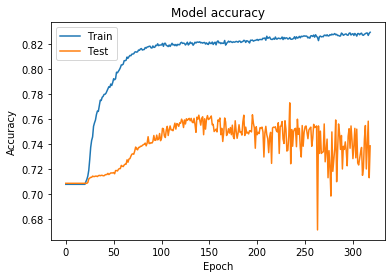

In [92]:
#Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [93]:
model4.evaluate(x_val ,y_val_bool)

98/98 [==============================] - 0s 3ms/step - loss: 0.4998 - accuracy: 0.7384


[0.4998343288898468, 0.7384369969367981]

# Model 5:

In [94]:
try:
    del history
except:
    pass
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss'
                                                  ,patience=200
                                                  ,min_delta = 0.05, verbose = 1)
model5 = model_five()
history = model5.fit(x_train ,y_train_bool ,epochs = 1000 ,validation_data=(x_val, y_val_bool)
              ,batch_size=1000 ,callbacks = [early_stopping])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                3480      
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
10/10 [==============================] - 1s 33ms/step - loss: 0.8293 - accuracy: 0.7114 - val_loss: 0.5257 - val_accuracy: 0.7129
Epoch 2/1000
10/10 [==============================] - 0s 17ms/step - loss: 0.4480 - accuracy: 0.7430 - val_loss: 0.4883 - val_accuracy: 0.7142
Epoch 3/1000
10/10 [==============================] - 0s 18ms/step - loss: 0.4047 - accuracy: 0.81

Epoch 53/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.3221 - accuracy: 0.8410 - val_loss: 0.5758 - val_accuracy: 0.7231
Epoch 54/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.3194 - accuracy: 0.8458 - val_loss: 0.6053 - val_accuracy: 0.7231
Epoch 55/1000
10/10 [==============================] - 0s 17ms/step - loss: 0.3156 - accuracy: 0.8456 - val_loss: 0.6068 - val_accuracy: 0.7244
Epoch 56/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.3171 - accuracy: 0.8460 - val_loss: 0.5844 - val_accuracy: 0.7222
Epoch 57/1000
10/10 [==============================] - 0s 17ms/step - loss: 0.3218 - accuracy: 0.8376 - val_loss: 0.6115 - val_accuracy: 0.7247
Epoch 58/1000
10/10 [==============================] - 0s 17ms/step - loss: 0.3204 - accuracy: 0.8395 - val_loss: 0.5695 - val_accuracy: 0.7289
Epoch 59/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.3121 - accuracy: 0.8497 - val_loss: 0.5837 - val_accuracy:

Epoch 110/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.3077 - accuracy: 0.8472 - val_loss: 0.6311 - val_accuracy: 0.7155
Epoch 111/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.3091 - accuracy: 0.8477 - val_loss: 0.6379 - val_accuracy: 0.7158
Epoch 112/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.2986 - accuracy: 0.8531 - val_loss: 0.6571 - val_accuracy: 0.7174
Epoch 113/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.3041 - accuracy: 0.8500 - val_loss: 0.7210 - val_accuracy: 0.7209
Epoch 114/1000
10/10 [==============================] - 0s 17ms/step - loss: 0.3027 - accuracy: 0.8523 - val_loss: 0.6856 - val_accuracy: 0.7190
Epoch 115/1000
10/10 [==============================] - 0s 17ms/step - loss: 0.3092 - accuracy: 0.8467 - val_loss: 0.6636 - val_accuracy: 0.7190
Epoch 116/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.3074 - accuracy: 0.8443 - val_loss: 0.6685 - val_ac

10/10 [==============================] - 0s 17ms/step - loss: 0.2973 - accuracy: 0.8485 - val_loss: 0.7463 - val_accuracy: 0.7333
Epoch 167/1000
10/10 [==============================] - 0s 17ms/step - loss: 0.3063 - accuracy: 0.8459 - val_loss: 0.6951 - val_accuracy: 0.7372
Epoch 168/1000
10/10 [==============================] - 0s 17ms/step - loss: 0.3006 - accuracy: 0.8532 - val_loss: 0.6821 - val_accuracy: 0.7368
Epoch 169/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.3052 - accuracy: 0.8443 - val_loss: 0.7118 - val_accuracy: 0.7352
Epoch 170/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.3035 - accuracy: 0.8512 - val_loss: 0.7183 - val_accuracy: 0.7365
Epoch 171/1000
10/10 [==============================] - 0s 17ms/step - loss: 0.3082 - accuracy: 0.8470 - val_loss: 0.7096 - val_accuracy: 0.7397
Epoch 172/1000
10/10 [==============================] - 0s 17ms/step - loss: 0.3018 - accuracy: 0.8473 - val_loss: 0.7713 - val_accuracy: 0.7384


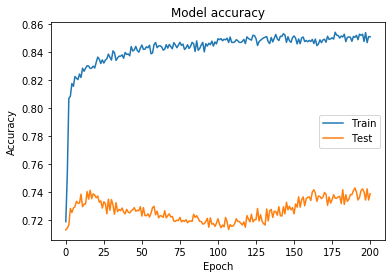

In [95]:
#Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [96]:
model5.evaluate(x_val ,y_val_bool)

98/98 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.7388


[0.6903107166290283, 0.738756000995636]

#### Preliminary conclusions on your models
Include some graphs and peformance metrics

Model 1:
The model's test and validation accuracy was comparable. This indicates that the model was able to generalize well with an accuracy of ~70%.

Model 2:
Decreasing the number of output nodes in the first layer by half performed similarly. This may mean the previous model can be simplified and perform simlarly.

Model 3:
By changing the activation function, the model performs worse.

Model 4:
Introducing a hidden layer allows the model to perform slightly worse than Model 1. This may mean this model is too complex. However, from the progression throughout epochs, the model appears to have escaped a local minima/maxima and continues to improve before cutting off. Possibly allowing it to run longer would prove to perform better.

Model 5:
Adding the dropout layer enabled the model to regularize and perform slightly better. This may mean model 1 was too complex.

Most of these models performed significantly better than the logistic regression model, but only marginally better than the random forest.

# Part 4: Cross-validation
We really should have used k-fold (eg. k=5) crossvalidation here, to not only evaluate our five keras/tensorflow models. See how your preliminary results change. Now that we have validation results with uncertainy (+- standard deviation), do your prior conclusion change.

In [97]:
from sklearn.model_selection import KFold
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)
x_train_test_val = np.concatenate((x_train, x_test ,x_val))
y_train_test_val = np.concatenate((y_train_bool, y_test_bool ,y_val_bool))

In [98]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy'
                                                  ,patience=200
                                                  ,min_delta = 0.05, verbose = 1)

# Model 1 cross-validation:

In [99]:
try:
    del history
except:
    pass

acc_per_fold = []
loss_per_fold = []
fold_no = 1

for train, test in kfold.split(x_train_test_val, y_train_test_val):
    # Fit data to model
    model1 = model_one()
    history = model1.fit(x_train_test_val[train] ,y_train_test_val[train] 
            ,epochs = 1000 ,batch_size=1000 ,callbacks = [early_stopping])

    # Generate generalization metrics
    scores = model1.evaluate(x_train_test_val[test], y_train_test_val[test], verbose=0)
    print(f'Score for fold {fold_no}: {model1.metrics_names[0]} of {scores[0]}; {model1.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1
    
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('--------------------------')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                3480      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.6923 - accuracy: 0.6147
Epoch 2/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5820 - accuracy: 0.7019
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5602 - accuracy: 0.7071
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5385 - accuracy: 0.7167
Epoch 5/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5222 - accuracy: 0.7285
Epoch 6/1000
13/

13/13 [==============================] - 0s 6ms/step - loss: 0.3830 - accuracy: 0.8155
Epoch 77/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3806 - accuracy: 0.8176
Epoch 78/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3824 - accuracy: 0.8199
Epoch 79/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3822 - accuracy: 0.8139
Epoch 80/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3813 - accuracy: 0.8175
Epoch 81/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3800 - accuracy: 0.8164
Epoch 82/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3734 - accuracy: 0.8224
Epoch 83/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3775 - accuracy: 0.8190
Epoch 84/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3724 - accuracy: 0.8221
Epoch 85/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3761 - accuracy: 0.8218
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.3697 - accuracy: 0.8285
Epoch 157/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3673 - accuracy: 0.8244
Epoch 158/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3732 - accuracy: 0.8237
Epoch 159/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3664 - accuracy: 0.8301
Epoch 160/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3615 - accuracy: 0.8295
Epoch 161/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3736 - accuracy: 0.8256
Epoch 162/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3667 - accuracy: 0.8273
Epoch 163/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3684 - accuracy: 0.8259
Epoch 164/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3715 - accuracy: 0.8251
Epoch 165/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3653 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.3642 - accuracy: 0.8228
Epoch 237/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3651 - accuracy: 0.8290
Epoch 238/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3657 - accuracy: 0.8242
Epoch 239/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3633 - accuracy: 0.8242
Epoch 240/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3608 - accuracy: 0.8302
Epoch 241/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3699 - accuracy: 0.8218
Epoch 242/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3686 - accuracy: 0.8236
Epoch 243/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3690 - accuracy: 0.8252
Epoch 244/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3641 - accuracy: 0.8280
Epoch 245/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3667 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.3618 - accuracy: 0.8281
Epoch 317/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3636 - accuracy: 0.8260
Epoch 318/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3621 - accuracy: 0.8277
Epoch 319/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3629 - accuracy: 0.8240
Epoch 320/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3570 - accuracy: 0.8296
Epoch 321/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3549 - accuracy: 0.8334
Epoch 322/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3620 - accuracy: 0.8292
Epoch 323/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3598 - accuracy: 0.8287
Epoch 324/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3581 - accuracy: 0.8321
Epoch 325/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3568 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.3546 - accuracy: 0.8310
Epoch 397/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3588 - accuracy: 0.8266
Epoch 398/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3625 - accuracy: 0.8274
Epoch 399/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3500 - accuracy: 0.8337
Epoch 400/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3543 - accuracy: 0.8314
Epoch 401/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3624 - accuracy: 0.8272
Epoch 402/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3620 - accuracy: 0.8247
Epoch 403/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3527 - accuracy: 0.8327
Epoch 404/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3516 - accuracy: 0.8367
Epoch 405/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3578 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.3775 - accuracy: 0.8210
Epoch 61/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3826 - accuracy: 0.8148
Epoch 62/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3814 - accuracy: 0.8159
Epoch 63/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3809 - accuracy: 0.8211
Epoch 64/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3761 - accuracy: 0.8169
Epoch 65/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3747 - accuracy: 0.8212
Epoch 66/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3811 - accuracy: 0.8182
Epoch 67/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3790 - accuracy: 0.8159
Epoch 68/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3801 - accuracy: 0.8169
Epoch 69/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3782 - accuracy: 0.8194
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.3662 - accuracy: 0.8271
Epoch 141/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3680 - accuracy: 0.8216
Epoch 142/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3710 - accuracy: 0.8219
Epoch 143/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3738 - accuracy: 0.8205
Epoch 144/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3704 - accuracy: 0.8238
Epoch 145/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3718 - accuracy: 0.8235
Epoch 146/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3707 - accuracy: 0.8249
Epoch 147/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3656 - accuracy: 0.8264
Epoch 148/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3617 - accuracy: 0.8295
Epoch 149/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3695 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.5922 - accuracy: 0.7080
Epoch 2/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5653 - accuracy: 0.7109
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5470 - accuracy: 0.7129
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5258 - accuracy: 0.7216
Epoch 5/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5068 - accuracy: 0.7395
Epoch 6/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4946 - accuracy: 0.7460
Epoch 7/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4864 - accuracy: 0.7485
Epoch 8/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4804 - accuracy: 0.7521
Epoch 9/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4688 - accuracy: 0.7559
Epoch 10/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4648 - accuracy: 0.7606
Epoch 11/100

13/13 [==============================] - 0s 6ms/step - loss: 0.3834 - accuracy: 0.8165
Epoch 83/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3901 - accuracy: 0.8133
Epoch 84/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3864 - accuracy: 0.8129
Epoch 85/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3853 - accuracy: 0.8153
Epoch 86/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3812 - accuracy: 0.8173
Epoch 87/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3792 - accuracy: 0.8204
Epoch 88/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3919 - accuracy: 0.8118
Epoch 89/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3876 - accuracy: 0.8130
Epoch 90/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3881 - accuracy: 0.8099
Epoch 91/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3875 - accuracy: 0.8111
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.3715 - accuracy: 0.8232
Epoch 163/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3749 - accuracy: 0.8214
Epoch 164/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3809 - accuracy: 0.8152
Epoch 165/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3812 - accuracy: 0.8156
Epoch 166/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3757 - accuracy: 0.8187
Epoch 167/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3833 - accuracy: 0.8154
Epoch 168/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3712 - accuracy: 0.8263
Epoch 169/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3736 - accuracy: 0.8205
Epoch 170/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3751 - accuracy: 0.8243
Epoch 171/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3739 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.3720 - accuracy: 0.8240
Epoch 243/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3689 - accuracy: 0.8260
Epoch 244/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3720 - accuracy: 0.8240
Epoch 245/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3630 - accuracy: 0.8267
Epoch 246/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3751 - accuracy: 0.8203
Epoch 247/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3732 - accuracy: 0.8217
Epoch 248/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3706 - accuracy: 0.8245
Epoch 249/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3788 - accuracy: 0.8154
Epoch 250/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3703 - accuracy: 0.8214
Epoch 251/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3672 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.3855 - accuracy: 0.8154
Epoch 59/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3820 - accuracy: 0.8162
Epoch 60/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3889 - accuracy: 0.8136
Epoch 61/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3806 - accuracy: 0.8161
Epoch 62/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3859 - accuracy: 0.8168
Epoch 63/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3796 - accuracy: 0.8154
Epoch 64/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3946 - accuracy: 0.8078
Epoch 65/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3751 - accuracy: 0.8184
Epoch 66/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3826 - accuracy: 0.8186
Epoch 67/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3791 - accuracy: 0.8197
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.3747 - accuracy: 0.8224
Epoch 139/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3729 - accuracy: 0.8193
Epoch 140/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3682 - accuracy: 0.8234
Epoch 141/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3771 - accuracy: 0.8226
Epoch 142/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3726 - accuracy: 0.8234
Epoch 143/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3711 - accuracy: 0.8242
Epoch 144/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3721 - accuracy: 0.8258
Epoch 145/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3736 - accuracy: 0.8207
Epoch 146/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3690 - accuracy: 0.8231
Epoch 147/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3733 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.6212 - accuracy: 0.6517
Epoch 2/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5643 - accuracy: 0.7116
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5376 - accuracy: 0.7185
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5222 - accuracy: 0.7233
Epoch 5/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5025 - accuracy: 0.7386
Epoch 6/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4863 - accuracy: 0.7464
Epoch 7/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4786 - accuracy: 0.7573
Epoch 8/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4670 - accuracy: 0.7599
Epoch 9/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4595 - accuracy: 0.7619
Epoch 10/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4529 - accuracy: 0.7697
Epoch 11/100

13/13 [==============================] - 0s 6ms/step - loss: 0.3804 - accuracy: 0.8194
Epoch 83/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3746 - accuracy: 0.8218
Epoch 84/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3755 - accuracy: 0.8211
Epoch 85/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3763 - accuracy: 0.8228
Epoch 86/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3702 - accuracy: 0.8234
Epoch 87/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3725 - accuracy: 0.8210
Epoch 88/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3750 - accuracy: 0.8232
Epoch 89/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3759 - accuracy: 0.8221
Epoch 90/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3732 - accuracy: 0.8239
Epoch 91/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3719 - accuracy: 0.8234
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.3634 - accuracy: 0.8277
Epoch 163/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3635 - accuracy: 0.8294
Epoch 164/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3638 - accuracy: 0.8287
Epoch 165/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3654 - accuracy: 0.8291
Epoch 166/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3706 - accuracy: 0.8237
Epoch 167/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3699 - accuracy: 0.8230
Epoch 168/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3670 - accuracy: 0.8245
Epoch 169/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3670 - accuracy: 0.8280
Epoch 170/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3731 - accuracy: 0.8243
Epoch 171/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3660 - accuracy: 0.

# Model 2 cross-validation:    

In [100]:
try:
    del history
except:
    pass

acc_per_fold = []
loss_per_fold = []
fold_no = 1

for train, test in kfold.split(x_train_test_val, y_train_test_val):
    # Fit data to model
    model2 = model_two()
    history = model2.fit(x_train_test_val[train] ,y_train_test_val[train] 
            ,epochs = 1000 ,batch_size=1000 ,callbacks = [early_stopping])

    # Generate generalization metrics
    scores = model_two().evaluate(x_train_test_val[test], y_train_test_val[test], verbose=0)
    print(f'Score for fold {fold_no}: {model2.metrics_names[0]} of {scores[0]}; {model2.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1
    
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('--------------------------')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                1740      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.6234 - accuracy: 0.6651
Epoch 2/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5764 - accuracy: 0.7105
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5548 - accuracy: 0.7146
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5390 - accuracy: 0.7169
Epoch 5/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5274 - accuracy: 0.7164
Epoch 6/1000
13/

13/13 [==============================] - 0s 5ms/step - loss: 0.3804 - accuracy: 0.8160
Epoch 77/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3778 - accuracy: 0.8223
Epoch 78/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3744 - accuracy: 0.8257
Epoch 79/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3793 - accuracy: 0.8189
Epoch 80/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3740 - accuracy: 0.8214
Epoch 81/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3788 - accuracy: 0.8192
Epoch 82/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3731 - accuracy: 0.8216
Epoch 83/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3797 - accuracy: 0.8164
Epoch 84/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3778 - accuracy: 0.8207
Epoch 85/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3778 - accuracy: 0.8237
Epoc

13/13 [==============================] - 0s 5ms/step - loss: 0.3689 - accuracy: 0.8241
Epoch 157/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3625 - accuracy: 0.8302
Epoch 158/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3679 - accuracy: 0.8207
Epoch 159/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3687 - accuracy: 0.8235
Epoch 160/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3703 - accuracy: 0.8251
Epoch 161/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3707 - accuracy: 0.8214
Epoch 162/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3681 - accuracy: 0.8260
Epoch 163/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3753 - accuracy: 0.8213
Epoch 164/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3672 - accuracy: 0.8223
Epoch 165/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3671 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.6502 - accuracy: 0.6033
Epoch 2/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5797 - accuracy: 0.7011
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5551 - accuracy: 0.7093
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5416 - accuracy: 0.7112
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5266 - accuracy: 0.7203
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5112 - accuracy: 0.7284
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4997 - accuracy: 0.7394
Epoch 8/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4899 - accuracy: 0.7454
Epoch 9/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4758 - accuracy: 0.7546
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4708 - accuracy: 0.7576
Epoch 11/100

13/13 [==============================] - 0s 5ms/step - loss: 0.3798 - accuracy: 0.8204
Epoch 83/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3802 - accuracy: 0.8211
Epoch 84/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3806 - accuracy: 0.8195
Epoch 85/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3801 - accuracy: 0.8183
Epoch 86/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3802 - accuracy: 0.8198
Epoch 87/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3854 - accuracy: 0.8166
Epoch 88/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3724 - accuracy: 0.8252
Epoch 89/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3772 - accuracy: 0.8200
Epoch 90/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3842 - accuracy: 0.8170
Epoch 91/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3819 - accuracy: 0.8194
Epoc

13/13 [==============================] - 0s 5ms/step - loss: 0.3731 - accuracy: 0.8238
Epoch 163/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3699 - accuracy: 0.8239
Epoch 164/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3711 - accuracy: 0.8248
Epoch 165/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3739 - accuracy: 0.8211
Epoch 166/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3682 - accuracy: 0.8286
Epoch 167/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3705 - accuracy: 0.8209
Epoch 168/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3727 - accuracy: 0.8206
Epoch 169/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3637 - accuracy: 0.8276
Epoch 170/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3757 - accuracy: 0.8210
Epoch 171/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3713 - accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.3736 - accuracy: 0.8189
Epoch 243/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3654 - accuracy: 0.8285
Epoch 244/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3676 - accuracy: 0.8262
Epoch 245/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3644 - accuracy: 0.8294
Epoch 246/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3614 - accuracy: 0.8316
Epoch 247/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3684 - accuracy: 0.8275
Epoch 248/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3680 - accuracy: 0.8251
Epoch 249/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3678 - accuracy: 0.8257
Epoch 250/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3659 - accuracy: 0.8288
Epoch 251/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3636 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.3655 - accuracy: 0.8277
Epoch 323/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3693 - accuracy: 0.8226
Epoch 324/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3596 - accuracy: 0.8316
Epoch 325/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3635 - accuracy: 0.8253
Epoch 326/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3638 - accuracy: 0.8274
Epoch 327/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3654 - accuracy: 0.8262
Epoch 328/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3539 - accuracy: 0.8332
Epoch 329/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3598 - accuracy: 0.8325
Epoch 330/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3659 - accuracy: 0.8259
Epoch 331/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3569 - accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.3925 - accuracy: 0.8114
Epoch 42/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3894 - accuracy: 0.8154
Epoch 43/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3913 - accuracy: 0.8139
Epoch 44/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3964 - accuracy: 0.8086
Epoch 45/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3924 - accuracy: 0.8124
Epoch 46/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3919 - accuracy: 0.8136
Epoch 47/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3844 - accuracy: 0.8181
Epoch 48/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3886 - accuracy: 0.8143
Epoch 49/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3868 - accuracy: 0.8143
Epoch 50/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3878 - accuracy: 0.8155
Epoc

13/13 [==============================] - 0s 5ms/step - loss: 0.3806 - accuracy: 0.8220
Epoch 123/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3738 - accuracy: 0.8189
Epoch 124/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3685 - accuracy: 0.8243
Epoch 125/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3721 - accuracy: 0.8267
Epoch 126/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3660 - accuracy: 0.8271
Epoch 127/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3712 - accuracy: 0.8261
Epoch 128/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3766 - accuracy: 0.8226
Epoch 129/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3677 - accuracy: 0.8288
Epoch 130/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3715 - accuracy: 0.8274
Epoch 131/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3778 - accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.3657 - accuracy: 0.8286
Epoch 203/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3672 - accuracy: 0.8250
Epoch 204/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3613 - accuracy: 0.8304
Epoch 205/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3655 - accuracy: 0.8297
Epoch 206/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3654 - accuracy: 0.8264
Epoch 207/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3767 - accuracy: 0.8208
Epoch 208/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3664 - accuracy: 0.8278
Epoch 209/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3663 - accuracy: 0.8294
Epoch 210/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3692 - accuracy: 0.8287
Epoch 211/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3635 - accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.3939 - accuracy: 0.8071
Epoch 42/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3985 - accuracy: 0.8069
Epoch 43/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3908 - accuracy: 0.8135
Epoch 44/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3988 - accuracy: 0.8076
Epoch 45/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3916 - accuracy: 0.8106
Epoch 46/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3918 - accuracy: 0.8074
Epoch 47/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3917 - accuracy: 0.8122
Epoch 48/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3909 - accuracy: 0.8147
Epoch 49/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3806 - accuracy: 0.8160
Epoch 50/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3909 - accuracy: 0.8095
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.3698 - accuracy: 0.8238
Epoch 123/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3819 - accuracy: 0.8178
Epoch 124/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3731 - accuracy: 0.8208
Epoch 125/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3785 - accuracy: 0.8126
Epoch 126/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3696 - accuracy: 0.8257
Epoch 127/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3743 - accuracy: 0.8176
Epoch 128/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3756 - accuracy: 0.8189
Epoch 129/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3697 - accuracy: 0.8221
Epoch 130/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3684 - accuracy: 0.8215
Epoch 131/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3782 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.3661 - accuracy: 0.8220
Epoch 203/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3664 - accuracy: 0.8231
Epoch 204/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3693 - accuracy: 0.8196
Epoch 205/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3646 - accuracy: 0.8264
Epoch 206/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3678 - accuracy: 0.8239
Epoch 207/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3667 - accuracy: 0.8243
Epoch 208/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3666 - accuracy: 0.8242
Epoch 209/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3583 - accuracy: 0.8291
Epoch 210/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3692 - accuracy: 0.8240
Epoch 211/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3662 - accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.3805 - accuracy: 0.8194
Epoch 52/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3842 - accuracy: 0.8182
Epoch 53/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3865 - accuracy: 0.8158
Epoch 54/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3820 - accuracy: 0.8193
Epoch 55/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3730 - accuracy: 0.8276
Epoch 56/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3833 - accuracy: 0.8156
Epoch 57/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3775 - accuracy: 0.8211
Epoch 58/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3800 - accuracy: 0.8170
Epoch 59/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3831 - accuracy: 0.8187
Epoch 60/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3776 - accuracy: 0.8216
Epoc

13/13 [==============================] - 0s 5ms/step - loss: 0.3740 - accuracy: 0.8199
Epoch 132/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3692 - accuracy: 0.8239
Epoch 133/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3726 - accuracy: 0.8175
Epoch 134/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3708 - accuracy: 0.8218
Epoch 135/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3726 - accuracy: 0.8219
Epoch 136/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3681 - accuracy: 0.8262
Epoch 137/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3696 - accuracy: 0.8183
Epoch 138/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3630 - accuracy: 0.8242
Epoch 139/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3696 - accuracy: 0.8243
Epoch 140/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3639 - accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.3642 - accuracy: 0.8250
Epoch 212/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3661 - accuracy: 0.8228
Epoch 213/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3590 - accuracy: 0.8265
Epoch 214/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3582 - accuracy: 0.8262
Epoch 215/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3632 - accuracy: 0.8268
Epoch 216/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3612 - accuracy: 0.8262
Epoch 217/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3581 - accuracy: 0.8322
Epoch 218/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3582 - accuracy: 0.8286
Epoch 219/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3554 - accuracy: 0.8275
Epoch 220/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3676 - accuracy: 0.

# Model 3 cross-validation:

In [101]:
try:
    del history
except:
    pass

acc_per_fold = []
loss_per_fold = []
fold_no = 1

for train, test in kfold.split(x_train_test_val, y_train_test_val):
    # Fit data to 
    model3 = model_three()
    history = model3.fit(x_train_test_val[train] ,y_train_test_val[train] 
            ,epochs = 1000 ,batch_size=1000 ,callbacks = [early_stopping])

    # Generate generalization metrics
    scores = model3.evaluate(x_train_test_val[test], y_train_test_val[test], verbose=0)
    print(f'Score for fold {fold_no}: {model3.metrics_names[0]} of {scores[0]}; {model3.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1
    
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('--------------------------')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                3480      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
13/13 [==============================] - 0s 6ms/step - loss: 5.5906 - accuracy: 0.6104
Epoch 2/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4341 - accuracy: 0.7092
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4487 - accuracy: 0.7083
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5493 - accuracy: 0.7017
Epoch 5/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4332 - accuracy: 0.7093
Epoch 6/1000
13/

13/13 [==============================] - 0s 6ms/step - loss: 4.4137 - accuracy: 0.7106
Epoch 77/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4644 - accuracy: 0.7072
Epoch 78/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4954 - accuracy: 0.7052
Epoch 79/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4700 - accuracy: 0.7069
Epoch 80/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5116 - accuracy: 0.7041
Epoch 81/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5331 - accuracy: 0.7027
Epoch 82/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4711 - accuracy: 0.7068
Epoch 83/1000
13/13 [==============================] - 0s 5ms/step - loss: 4.5172 - accuracy: 0.7038
Epoch 84/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5145 - accuracy: 0.7040
Epoch 85/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.3507 - accuracy: 0.7147
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 4.4958 - accuracy: 0.7052
Epoch 157/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4685 - accuracy: 0.7070
Epoch 158/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4446 - accuracy: 0.7085
Epoch 159/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5519 - accuracy: 0.7015
Epoch 160/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4812 - accuracy: 0.7061
Epoch 161/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5029 - accuracy: 0.7047
Epoch 162/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5441 - accuracy: 0.7020
Epoch 163/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4687 - accuracy: 0.7070
Epoch 164/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4554 - accuracy: 0.7078
Epoch 165/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.3966 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 4.4779 - accuracy: 0.7064
Epoch 29/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4304 - accuracy: 0.7095
Epoch 30/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5003 - accuracy: 0.7049
Epoch 31/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5067 - accuracy: 0.7045
Epoch 32/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5054 - accuracy: 0.7046
Epoch 33/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.6066 - accuracy: 0.6979
Epoch 34/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5342 - accuracy: 0.7027
Epoch 35/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4871 - accuracy: 0.7057
Epoch 36/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5330 - accuracy: 0.7027
Epoch 37/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5415 - accuracy: 0.7022
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 4.4634 - accuracy: 0.7073
Epoch 110/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4739 - accuracy: 0.7066
Epoch 111/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5531 - accuracy: 0.7014
Epoch 112/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5776 - accuracy: 0.6998
Epoch 113/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4791 - accuracy: 0.7063
Epoch 114/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5310 - accuracy: 0.7029
Epoch 115/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5267 - accuracy: 0.7032
Epoch 116/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5483 - accuracy: 0.7017
Epoch 117/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4479 - accuracy: 0.7083
Epoch 118/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.6193 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 4.5406 - accuracy: 0.7022
Epoch 190/1000
13/13 [==============================] - 0s 5ms/step - loss: 4.6016 - accuracy: 0.6982
Epoch 191/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4367 - accuracy: 0.7091
Epoch 192/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.6121 - accuracy: 0.6976
Epoch 193/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5055 - accuracy: 0.7045
Epoch 194/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5280 - accuracy: 0.7031
Epoch 195/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4432 - accuracy: 0.7086
Epoch 196/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5011 - accuracy: 0.7048
Epoch 197/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5537 - accuracy: 0.7014
Epoch 198/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5195 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 4.4549 - accuracy: 0.7079
Epoch 63/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4197 - accuracy: 0.7102
Epoch 64/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4108 - accuracy: 0.7108
Epoch 65/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.3977 - accuracy: 0.7116
Epoch 66/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4055 - accuracy: 0.7111
Epoch 67/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4740 - accuracy: 0.7066
Epoch 68/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.3604 - accuracy: 0.7141
Epoch 69/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4501 - accuracy: 0.7082
Epoch 70/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4723 - accuracy: 0.7067
Epoch 71/1000
13/13 [==============================] - 0s 5ms/step - loss: 4.3600 - accuracy: 0.7141
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 4.4623 - accuracy: 0.7074
Epoch 143/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.3865 - accuracy: 0.7123
Epoch 144/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.3958 - accuracy: 0.7117
Epoch 145/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4774 - accuracy: 0.7064
Epoch 146/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4687 - accuracy: 0.7070
Epoch 147/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4565 - accuracy: 0.7078
Epoch 148/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.3386 - accuracy: 0.7155
Epoch 149/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.3363 - accuracy: 0.7156
Epoch 150/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.3667 - accuracy: 0.7136
Epoch 151/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4925 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 4.4595 - accuracy: 0.7076
Epoch 15/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4409 - accuracy: 0.7088
Epoch 16/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5218 - accuracy: 0.7035
Epoch 17/1000
13/13 [==============================] - 0s 5ms/step - loss: 4.3850 - accuracy: 0.7124
Epoch 18/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4348 - accuracy: 0.7092
Epoch 19/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4287 - accuracy: 0.7096
Epoch 20/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4195 - accuracy: 0.7102
Epoch 21/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4013 - accuracy: 0.7114
Epoch 22/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4819 - accuracy: 0.7061
Epoch 23/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4582 - accuracy: 0.7076
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 4.3815 - accuracy: 0.7127
Epoch 96/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.3793 - accuracy: 0.7128
Epoch 97/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4294 - accuracy: 0.7095
Epoch 98/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4495 - accuracy: 0.7082
Epoch 99/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.3954 - accuracy: 0.7118
Epoch 100/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4715 - accuracy: 0.7068
Epoch 101/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4928 - accuracy: 0.7054
Epoch 102/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4840 - accuracy: 0.7060
Epoch 103/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4436 - accuracy: 0.7086
Epoch 104/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.3383 - accuracy: 0.7155

13/13 [==============================] - 0s 5ms/step - loss: 4.3685 - accuracy: 0.7135
Epoch 176/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4387 - accuracy: 0.7089
Epoch 177/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4695 - accuracy: 0.7069
Epoch 178/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5369 - accuracy: 0.7025
Epoch 179/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4700 - accuracy: 0.7069
Epoch 180/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4950 - accuracy: 0.7052
Epoch 181/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4826 - accuracy: 0.7060
Epoch 182/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4378 - accuracy: 0.7090
Epoch 183/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4361 - accuracy: 0.7091
Epoch 184/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4019 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 4.5152 - accuracy: 0.7039
Epoch 47/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4211 - accuracy: 0.7101
Epoch 48/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.3694 - accuracy: 0.7135
Epoch 49/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.3955 - accuracy: 0.7118
Epoch 50/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4659 - accuracy: 0.7071
Epoch 51/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.3788 - accuracy: 0.7129
Epoch 52/1000
13/13 [==============================] - 0s 5ms/step - loss: 4.4555 - accuracy: 0.7078
Epoch 53/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.3899 - accuracy: 0.7121
Epoch 54/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4370 - accuracy: 0.7090
Epoch 55/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4649 - accuracy: 0.7072
Epoc

Epoch 127/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4110 - accuracy: 0.7107
Epoch 128/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.3822 - accuracy: 0.7126
Epoch 129/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.3785 - accuracy: 0.7129
Epoch 130/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4794 - accuracy: 0.7063
Epoch 131/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4998 - accuracy: 0.7049
Epoch 132/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.3817 - accuracy: 0.7127
Epoch 133/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4006 - accuracy: 0.7114
Epoch 134/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4404 - accuracy: 0.7088
Epoch 135/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.4215 - accuracy: 0.7100
Epoch 136/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.5743

# Model 4 cross-validation:    

In [102]:
try:
    del history
except:
    pass

acc_per_fold = []
loss_per_fold = []
fold_no = 1

for train, test in kfold.split(x_train_test_val, y_train_test_val):
    # Fit data to model
    model4 = model_four()
    history = model4.fit(x_train_test_val[train] ,y_train_test_val[train] 
            ,epochs = 1000 ,batch_size=1000 ,callbacks = [early_stopping])

    # Generate generalization metrics
    scores = model4.evaluate(x_train_test_val[test] , y_train_test_val[test] , verbose=0)
    print(f'Score for fold {fold_no}: {model4.metrics_names[0]} of {scores[0]}; {model4.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1
    
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('--------------------------')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                3480      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                410       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 3,901
Trainable params: 3,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.6285 - accuracy: 0.7049
Epoch 2/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.6048 - accuracy: 0.7044
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.6037 - accuracy: 0.7024
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5990 - a

13/13 [==============================] - 0s 6ms/step - loss: 0.3897 - accuracy: 0.8100
Epoch 75/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3873 - accuracy: 0.8137
Epoch 76/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3915 - accuracy: 0.8068
Epoch 77/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3911 - accuracy: 0.8101
Epoch 78/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3891 - accuracy: 0.8115
Epoch 79/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3896 - accuracy: 0.8127
Epoch 80/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3888 - accuracy: 0.8092
Epoch 81/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3893 - accuracy: 0.8109
Epoch 82/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3914 - accuracy: 0.8093
Epoch 83/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3945 - accuracy: 0.8081
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.3770 - accuracy: 0.8181
Epoch 155/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3789 - accuracy: 0.8151
Epoch 156/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3808 - accuracy: 0.8167
Epoch 157/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3788 - accuracy: 0.8183
Epoch 158/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3765 - accuracy: 0.8181
Epoch 159/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3761 - accuracy: 0.8208
Epoch 160/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3836 - accuracy: 0.8092
Epoch 161/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3804 - accuracy: 0.8177
Epoch 162/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3784 - accuracy: 0.8195
Epoch 163/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3802 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.3641 - accuracy: 0.8283
Epoch 235/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3675 - accuracy: 0.8259
Epoch 236/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3696 - accuracy: 0.8255
Epoch 237/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3646 - accuracy: 0.8261
Epoch 238/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3709 - accuracy: 0.8218
Epoch 239/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3764 - accuracy: 0.8212
Epoch 240/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3771 - accuracy: 0.8202
Epoch 241/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3795 - accuracy: 0.8156
Epoch 242/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3754 - accuracy: 0.8186
Epoch 243/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3737 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.3949 - accuracy: 0.8085
Epoch 55/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3943 - accuracy: 0.8073
Epoch 56/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3893 - accuracy: 0.8157
Epoch 57/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3868 - accuracy: 0.8149
Epoch 58/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3847 - accuracy: 0.8156
Epoch 59/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3840 - accuracy: 0.8148
Epoch 60/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3866 - accuracy: 0.8132
Epoch 61/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3860 - accuracy: 0.8178
Epoch 62/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3844 - accuracy: 0.8145
Epoch 63/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3890 - accuracy: 0.8120
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.3668 - accuracy: 0.8260
Epoch 135/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3734 - accuracy: 0.8203
Epoch 136/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3656 - accuracy: 0.8260
Epoch 137/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3775 - accuracy: 0.8172
Epoch 138/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3658 - accuracy: 0.8255
Epoch 139/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3747 - accuracy: 0.8219
Epoch 140/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3654 - accuracy: 0.8267
Epoch 141/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3683 - accuracy: 0.8234
Epoch 142/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3724 - accuracy: 0.8222
Epoch 143/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3664 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.3541 - accuracy: 0.8307
Epoch 215/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3650 - accuracy: 0.8235
Epoch 216/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3626 - accuracy: 0.8240
Epoch 217/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3617 - accuracy: 0.8292
Epoch 218/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3570 - accuracy: 0.8312
Epoch 219/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3624 - accuracy: 0.8295
Epoch 220/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3728 - accuracy: 0.8189
Epoch 221/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3665 - accuracy: 0.8253
Epoch 222/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3575 - accuracy: 0.8307
Epoch 223/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3686 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.4171 - accuracy: 0.7938
Epoch 39/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4085 - accuracy: 0.7987
Epoch 40/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4130 - accuracy: 0.7951
Epoch 41/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4071 - accuracy: 0.8032
Epoch 42/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4044 - accuracy: 0.8016
Epoch 43/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4003 - accuracy: 0.8084
Epoch 44/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3981 - accuracy: 0.8048
Epoch 45/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4034 - accuracy: 0.8024
Epoch 46/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3979 - accuracy: 0.8095
Epoch 47/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4023 - accuracy: 0.8080
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.3724 - accuracy: 0.8259
Epoch 120/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3822 - accuracy: 0.8182
Epoch 121/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3711 - accuracy: 0.8272
Epoch 122/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3758 - accuracy: 0.8214
Epoch 123/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3735 - accuracy: 0.8244
Epoch 124/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3755 - accuracy: 0.8195
Epoch 125/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3800 - accuracy: 0.8163
Epoch 126/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3673 - accuracy: 0.8278
Epoch 127/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3777 - accuracy: 0.8226
Epoch 128/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3727 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.3715 - accuracy: 0.8268
Epoch 200/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3637 - accuracy: 0.8300
Epoch 201/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3775 - accuracy: 0.8121
Epoch 202/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3664 - accuracy: 0.8229
Epoch 203/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3633 - accuracy: 0.8292
Epoch 204/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3706 - accuracy: 0.8248
Epoch 205/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3748 - accuracy: 0.8160
Epoch 206/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3658 - accuracy: 0.8243
Epoch 207/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3621 - accuracy: 0.8266
Epoch 208/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3671 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.4570 - accuracy: 0.7668
Epoch 24/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4499 - accuracy: 0.7701
Epoch 25/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4510 - accuracy: 0.7702
Epoch 26/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4386 - accuracy: 0.7751
Epoch 27/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4480 - accuracy: 0.7731
Epoch 28/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4357 - accuracy: 0.7783
Epoch 29/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4355 - accuracy: 0.7822
Epoch 30/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4297 - accuracy: 0.7796
Epoch 31/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4264 - accuracy: 0.7841
Epoch 32/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4255 - accuracy: 0.7850
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.3797 - accuracy: 0.8176
Epoch 105/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3828 - accuracy: 0.8116
Epoch 106/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3794 - accuracy: 0.8205
Epoch 107/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3782 - accuracy: 0.8143
Epoch 108/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3789 - accuracy: 0.8187
Epoch 109/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3820 - accuracy: 0.8198
Epoch 110/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3761 - accuracy: 0.8206
Epoch 111/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3798 - accuracy: 0.8183
Epoch 112/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3801 - accuracy: 0.8176
Epoch 113/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3757 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.3789 - accuracy: 0.8169
Epoch 185/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3750 - accuracy: 0.8208
Epoch 186/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3676 - accuracy: 0.8271
Epoch 187/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3726 - accuracy: 0.8226
Epoch 188/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3745 - accuracy: 0.8249
Epoch 189/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3775 - accuracy: 0.8228
Epoch 190/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3668 - accuracy: 0.8237
Epoch 191/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3708 - accuracy: 0.8245
Epoch 192/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3655 - accuracy: 0.8266
Epoch 193/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3748 - accuracy: 0.

13/13 [==============================] - 0s 8ms/step - loss: 0.5700 - accuracy: 0.7120
Epoch 11/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.5713 - accuracy: 0.7039
Epoch 12/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.5587 - accuracy: 0.7112
Epoch 13/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5498 - accuracy: 0.7120
Epoch 14/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5429 - accuracy: 0.7146
Epoch 15/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5333 - accuracy: 0.7180
Epoch 16/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5191 - accuracy: 0.7248
Epoch 17/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5140 - accuracy: 0.7261
Epoch 18/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5069 - accuracy: 0.7346
Epoch 19/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4939 - accuracy: 0.7431
Epo

13/13 [==============================] - 0s 6ms/step - loss: 0.3771 - accuracy: 0.8196
Epoch 92/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3765 - accuracy: 0.8214
Epoch 93/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3863 - accuracy: 0.8140
Epoch 94/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3754 - accuracy: 0.8196
Epoch 95/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3846 - accuracy: 0.8163
Epoch 96/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3834 - accuracy: 0.8155
Epoch 97/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3879 - accuracy: 0.8141
Epoch 98/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3800 - accuracy: 0.8180
Epoch 99/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3762 - accuracy: 0.8180
Epoch 100/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3840 - accuracy: 0.8183
Epo

13/13 [==============================] - 0s 6ms/step - loss: 0.3725 - accuracy: 0.8226
Epoch 172/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3705 - accuracy: 0.8257
Epoch 173/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3684 - accuracy: 0.8245
Epoch 174/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3753 - accuracy: 0.8194
Epoch 175/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3705 - accuracy: 0.8261
Epoch 176/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3705 - accuracy: 0.8228
Epoch 177/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3695 - accuracy: 0.8243
Epoch 178/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3795 - accuracy: 0.8177
Epoch 179/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3598 - accuracy: 0.8320
Epoch 180/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3751 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.3657 - accuracy: 0.8261
Epoch 252/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3630 - accuracy: 0.8273
Epoch 00252: early stopping
Score for fold 5: loss of 0.3746683895587921; accuracy of 82.06764459609985%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.3467637598514557 - Accuracy: 84.178626537323%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.390645295381546 - Accuracy: 81.08453154563904%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.38339582085609436 - Accuracy: 81.75438642501831%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.3600591719150543 - Accuracy: 82.8972578048706%
-------------------------------------------------------------

# Model 5 cross-validation:

In [103]:
try:
    del history
except:
    pass

acc_per_fold = []
loss_per_fold = []
fold_no = 1

for train, test in kfold.split(x_train_test_val, y_train_test_val):
    # Fit data to model
    model5= model_five()
    history = model5.fit(x_train_test_val[train] ,y_train_test_val[train] 
            ,epochs = 1000 ,batch_size=1000 ,callbacks = [early_stopping])

    # Generate generalization metrics
    scores = model5.evaluate(x_train_test_val[test] , y_train_test_val[test] , verbose=0)
    print(f'Score for fold {fold_no}: {model5.metrics_names[0]} of {scores[0]}; {model5.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1
    
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('--------------------------')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                3480      
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
13/13 [==============================] - 1s 9ms/step - loss: 1.1962 - accuracy: 0.5526
Epoch 2/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.4848 - accuracy: 0.7225
Epoch 3/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.4501 - accuracy: 0.7707
Epoch 4/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.4237 - 

13/13 [==============================] - 0s 8ms/step - loss: 0.3483 - accuracy: 0.8286
Epoch 75/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3463 - accuracy: 0.8303
Epoch 76/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3402 - accuracy: 0.8301
Epoch 77/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3395 - accuracy: 0.8372
Epoch 78/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3452 - accuracy: 0.8314
Epoch 79/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3424 - accuracy: 0.8306
Epoch 80/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3405 - accuracy: 0.8379
Epoch 81/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3381 - accuracy: 0.8370
Epoch 82/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3368 - accuracy: 0.8364
Epoch 83/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3422 - accuracy: 0.8336
Epoc

13/13 [==============================] - 0s 8ms/step - loss: 0.3289 - accuracy: 0.8438
Epoch 155/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3305 - accuracy: 0.8386
Epoch 156/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3279 - accuracy: 0.8357
Epoch 157/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3265 - accuracy: 0.8417
Epoch 158/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3273 - accuracy: 0.8429
Epoch 159/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3212 - accuracy: 0.8410
Epoch 160/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3233 - accuracy: 0.8399
Epoch 161/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3343 - accuracy: 0.8373
Epoch 162/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3317 - accuracy: 0.8377
Epoch 163/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3291 - accuracy: 0.

13/13 [==============================] - 0s 8ms/step - loss: 0.3263 - accuracy: 0.8396
Epoch 235/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3165 - accuracy: 0.8430
Epoch 236/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3267 - accuracy: 0.8422
Epoch 237/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3214 - accuracy: 0.8433
Epoch 238/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3271 - accuracy: 0.8335
Epoch 239/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3282 - accuracy: 0.8401
Epoch 240/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3207 - accuracy: 0.8397
Epoch 241/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3281 - accuracy: 0.8389
Epoch 242/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3071 - accuracy: 0.8484
Epoch 243/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3218 - accuracy: 0.

13/13 [==============================] - 0s 8ms/step - loss: 0.3241 - accuracy: 0.8412
Epoch 315/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3218 - accuracy: 0.8395
Epoch 316/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3216 - accuracy: 0.8433
Epoch 317/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3270 - accuracy: 0.8371
Epoch 00317: early stopping
Score for fold 1: loss of 0.4324164092540741; accuracy of 81.40350580215454%
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                3480      
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 3,521


13/13 [==============================] - 0s 9ms/step - loss: 0.3125 - accuracy: 0.8475
Epoch 70/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3054 - accuracy: 0.8535
Epoch 71/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3133 - accuracy: 0.8518
Epoch 72/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3065 - accuracy: 0.8493
Epoch 73/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3033 - accuracy: 0.8574
Epoch 74/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3029 - accuracy: 0.8539
Epoch 75/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3070 - accuracy: 0.8497
Epoch 76/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3049 - accuracy: 0.8526
Epoch 77/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3020 - accuracy: 0.8563
Epoch 78/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3059 - accuracy: 0.8516
Epoc

13/13 [==============================] - 0s 8ms/step - loss: 0.2933 - accuracy: 0.8554
Epoch 150/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.2902 - accuracy: 0.8607
Epoch 151/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.2957 - accuracy: 0.8595
Epoch 152/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.2920 - accuracy: 0.8553
Epoch 153/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.2890 - accuracy: 0.8602
Epoch 154/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.2982 - accuracy: 0.8588
Epoch 155/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.2899 - accuracy: 0.8573
Epoch 156/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.2928 - accuracy: 0.8565
Epoch 157/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.2936 - accuracy: 0.8577
Epoch 158/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.2918 - accuracy: 0.

13/13 [==============================] - 0s 8ms/step - loss: 0.3750 - accuracy: 0.8234
Epoch 17/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3688 - accuracy: 0.8226
Epoch 18/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3667 - accuracy: 0.8212
Epoch 19/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3613 - accuracy: 0.8270
Epoch 20/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3683 - accuracy: 0.8166
Epoch 21/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3606 - accuracy: 0.8265
Epoch 22/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3592 - accuracy: 0.8229
Epoch 23/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3647 - accuracy: 0.8248
Epoch 24/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3587 - accuracy: 0.8208
Epoch 25/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3603 - accuracy: 0.8236
Epoc

13/13 [==============================] - 0s 9ms/step - loss: 0.3261 - accuracy: 0.8383
Epoch 98/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3269 - accuracy: 0.8381
Epoch 99/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3189 - accuracy: 0.8462
Epoch 100/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3258 - accuracy: 0.8427
Epoch 101/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3189 - accuracy: 0.8385
Epoch 102/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3215 - accuracy: 0.8389
Epoch 103/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3217 - accuracy: 0.8399
Epoch 104/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3232 - accuracy: 0.8413
Epoch 105/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3254 - accuracy: 0.8417
Epoch 106/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3197 - accuracy: 0.84

13/13 [==============================] - 0s 9ms/step - loss: 0.3125 - accuracy: 0.8457
Epoch 178/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3143 - accuracy: 0.8426
Epoch 179/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3232 - accuracy: 0.8402
Epoch 180/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3148 - accuracy: 0.8463
Epoch 181/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3174 - accuracy: 0.8415
Epoch 182/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3161 - accuracy: 0.8442
Epoch 183/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3110 - accuracy: 0.8463
Epoch 184/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3157 - accuracy: 0.8440
Epoch 185/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3139 - accuracy: 0.8463
Epoch 186/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3131 - accuracy: 0.

13/13 [==============================] - 0s 9ms/step - loss: 0.3570 - accuracy: 0.8297
Epoch 44/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3469 - accuracy: 0.8352
Epoch 45/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3482 - accuracy: 0.8321
Epoch 46/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3461 - accuracy: 0.8339
Epoch 47/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3481 - accuracy: 0.8325
Epoch 48/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3415 - accuracy: 0.8324
Epoch 49/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3455 - accuracy: 0.8340
Epoch 50/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3387 - accuracy: 0.8362
Epoch 51/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3474 - accuracy: 0.8339
Epoch 52/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3433 - accuracy: 0.8361
Epoc

13/13 [==============================] - 0s 8ms/step - loss: 0.3373 - accuracy: 0.8346
Epoch 125/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3365 - accuracy: 0.8337
Epoch 126/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3292 - accuracy: 0.8420
Epoch 127/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3329 - accuracy: 0.8391
Epoch 128/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3289 - accuracy: 0.8412
Epoch 129/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3371 - accuracy: 0.8359
Epoch 130/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3299 - accuracy: 0.8400
Epoch 131/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3359 - accuracy: 0.8366
Epoch 132/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3258 - accuracy: 0.8447
Epoch 133/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3356 - accuracy: 0.

13/13 [==============================] - 0s 8ms/step - loss: 0.3302 - accuracy: 0.8429
Epoch 205/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3337 - accuracy: 0.8349
Epoch 206/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3305 - accuracy: 0.8436
Epoch 207/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3269 - accuracy: 0.8433
Epoch 208/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3258 - accuracy: 0.8424
Epoch 209/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3232 - accuracy: 0.8482
Epoch 210/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3373 - accuracy: 0.8410
Epoch 211/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3255 - accuracy: 0.8414
Epoch 212/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3287 - accuracy: 0.8407
Epoch 213/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3321 - accuracy: 0.

13/13 [==============================] - 0s 9ms/step - loss: 0.3496 - accuracy: 0.8334
Epoch 52/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3495 - accuracy: 0.8361
Epoch 53/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3444 - accuracy: 0.8326
Epoch 54/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3493 - accuracy: 0.8317
Epoch 55/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3476 - accuracy: 0.8349
Epoch 56/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3510 - accuracy: 0.8279
Epoch 57/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3519 - accuracy: 0.8271
Epoch 58/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3489 - accuracy: 0.8296
Epoch 59/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3433 - accuracy: 0.8342
Epoch 60/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3554 - accuracy: 0.8260
Epoc

13/13 [==============================] - 0s 9ms/step - loss: 0.3293 - accuracy: 0.8394
Epoch 132/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3337 - accuracy: 0.8387
Epoch 133/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3331 - accuracy: 0.8388
Epoch 134/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3248 - accuracy: 0.8433
Epoch 135/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.3315 - accuracy: 0.8440
Epoch 136/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3340 - accuracy: 0.8408
Epoch 137/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3315 - accuracy: 0.8445
Epoch 138/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3246 - accuracy: 0.8456
Epoch 139/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3183 - accuracy: 0.8517
Epoch 140/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3315 - accuracy: 0

13/13 [==============================] - 0s 9ms/step - loss: 0.3295 - accuracy: 0.8434
Epoch 212/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3221 - accuracy: 0.8423
Epoch 213/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3327 - accuracy: 0.8377
Epoch 214/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3225 - accuracy: 0.8421
Epoch 215/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3190 - accuracy: 0.8469
Epoch 216/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3187 - accuracy: 0.8476
Epoch 217/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3230 - accuracy: 0.8417
Epoch 218/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3221 - accuracy: 0.8442
Epoch 219/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3309 - accuracy: 0.8389
Epoch 220/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3258 - accuracy: 0.

#### Fill in your Part 4 Conclusion here
Explain what you conclude on your models comparing preliminary results to those after cross-validation

Model 1:
The model's test and validation accuracy was comparable. This indicates that the model was able to generalize well with an increased accuracy of ~80%.

Model 2:
Decreasing the number of output nodes in the first layer by half performed significantly worse. The previous findings are reversed: Model 2 is too simple to address the problem.

Model 3:
The findings remain the same: by changing the activation function, the model appears to perform worse.

Model 4:
The previous findings remain the same, this model's performance is comparable to Model 1.

Model 5:
The previous findings are reversed, but with little confidence. The performance metrics are only slightly worse than Model 1.

Most of these models performed significantly better than the logistic regression model, and Model 1 and 4 performed better than the random forest by 10%.

# Part 5: Refining with Regularization
We know that our biggest problem, if our models are flexibile enough, will be overfitting. Please try to regularize your best 2 models to see if you can improve their results. Look at these questions:

Try regularizing each of your two best models, does the generalizability increase? of Decrease?
Is one more sensitive than the other? Why might this happen and why?
Please try this with all of your features and then with the reduced set of features.
Report your precision, recall and f1 score on the train and validation sets (no cross validatio yet).
Next carry out cross validation. Does regularization reduce under or overfitting? Why or why not?
Hint: Try both L1 or L2 norm for regularization or dropout

# Adding Regularization:

In [104]:
def model_one_reg(reg='l2'):
    tf.keras.backend.clear_session()
    model1 = Sequential()
    model1.add(Dense(40 ,input_shape=(86,) ,activation='sigmoid' ,kernel_regularizer=reg))
    model1.add(Dense(1 ,activation='sigmoid'))
    model1.compile(optimizer='sgd' ,loss='binary_crossentropy' ,metrics=['accuracy'])
    K.set_value(model1.optimizer.learning_rate, .3)
    model1.summary()
    
    return model1

#added hidden layer
def model_four_reg(reg='l2'):   
    tf.keras.backend.clear_session()
    model1 = Sequential()
    model1.add(Dense(40 ,input_shape=(86,) ,activation='sigmoid' ,kernel_regularizer=reg))
    model1.add(Dense(10 ,input_shape=(20,) ,activation='sigmoid' ,kernel_regularizer=reg))
    model1.add(Dense(1 ,activation='sigmoid'))
    model1.compile(optimizer='sgd' ,loss='binary_crossentropy' ,metrics=['accuracy'])
    K.set_value(model1.optimizer.learning_rate, .3)
    model1.summary()

    return model1

# Model 1 L2:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                3480      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
10/10 [==============================] - 1s 32ms/step - loss: 1.1653 - accuracy: 0.7094 - val_loss: 1.1372 - val_accuracy: 0.7085
Epoch 2/1000
10/10 [==============================] - 0s 15ms/step - loss: 1.0602 - accuracy: 0.7054 - val_loss: 1.0810 - val_accuracy: 0.7085
Epoch 3/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.9819 - accuracy: 0.7102 - val_loss: 1.0171 - val_accuracy: 0.7085
Epoch 4/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.9149 - acc

Epoch 54/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4372 - accuracy: 0.8027 - val_loss: 0.5405 - val_accuracy: 0.7531
Epoch 55/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.4343 - accuracy: 0.8070 - val_loss: 0.5396 - val_accuracy: 0.7506
Epoch 56/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4341 - accuracy: 0.8065 - val_loss: 0.5420 - val_accuracy: 0.7502
Epoch 57/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4327 - accuracy: 0.8037 - val_loss: 0.5412 - val_accuracy: 0.7506
Epoch 58/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4334 - accuracy: 0.8030 - val_loss: 0.5388 - val_accuracy: 0.7534
Epoch 59/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4368 - accuracy: 0.8050 - val_loss: 0.5381 - val_accuracy: 0.7515
Epoch 60/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4318 - accuracy: 0.8033 - val_loss: 0.5443 - val_accuracy:

Epoch 111/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4188 - accuracy: 0.8095 - val_loss: 0.5265 - val_accuracy: 0.7525
Epoch 112/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.4185 - accuracy: 0.8102 - val_loss: 0.5259 - val_accuracy: 0.7566
Epoch 113/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4146 - accuracy: 0.8180 - val_loss: 0.5349 - val_accuracy: 0.7451
Epoch 114/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4179 - accuracy: 0.8104 - val_loss: 0.5642 - val_accuracy: 0.7238
Epoch 115/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.4190 - accuracy: 0.8077 - val_loss: 0.5270 - val_accuracy: 0.7483
Epoch 116/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.4204 - accuracy: 0.8093 - val_loss: 0.5407 - val_accuracy: 0.7442
Epoch 117/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4190 - accuracy: 0.8119 - val_loss: 0.5329 - val_ac

10/10 [==============================] - 0s 14ms/step - loss: 0.4099 - accuracy: 0.8113 - val_loss: 0.5335 - val_accuracy: 0.7474
Epoch 168/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4099 - accuracy: 0.8165 - val_loss: 0.5239 - val_accuracy: 0.7541
Epoch 169/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4101 - accuracy: 0.8143 - val_loss: 0.5187 - val_accuracy: 0.7499
Epoch 170/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.4117 - accuracy: 0.8108 - val_loss: 0.5234 - val_accuracy: 0.7515
Epoch 171/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4117 - accuracy: 0.8162 - val_loss: 0.5233 - val_accuracy: 0.7525
Epoch 172/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4161 - accuracy: 0.8118 - val_loss: 0.5200 - val_accuracy: 0.7490
Epoch 173/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4086 - accuracy: 0.8149 - val_loss: 0.5193 - val_accuracy: 0.7569


10/10 [==============================] - 0s 15ms/step - loss: 0.4056 - accuracy: 0.8160 - val_loss: 0.5404 - val_accuracy: 0.7356
Epoch 224/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4090 - accuracy: 0.8110 - val_loss: 0.5498 - val_accuracy: 0.7250
Epoch 225/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4045 - accuracy: 0.8163 - val_loss: 0.5133 - val_accuracy: 0.7573
Epoch 226/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4097 - accuracy: 0.8154 - val_loss: 0.5144 - val_accuracy: 0.7547
Epoch 227/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4086 - accuracy: 0.8167 - val_loss: 0.5223 - val_accuracy: 0.7557
Epoch 228/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4073 - accuracy: 0.8068 - val_loss: 0.5492 - val_accuracy: 0.7279
Epoch 229/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4064 - accuracy: 0.8152 - val_loss: 0.5278 - val_accuracy: 0.7461


10/10 [==============================] - 0s 14ms/step - loss: 0.4085 - accuracy: 0.8080 - val_loss: 0.5451 - val_accuracy: 0.7285
Epoch 280/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4063 - accuracy: 0.8113 - val_loss: 0.5198 - val_accuracy: 0.7515
Epoch 281/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4013 - accuracy: 0.8178 - val_loss: 0.5109 - val_accuracy: 0.7566
Epoch 282/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4110 - accuracy: 0.8071 - val_loss: 0.5451 - val_accuracy: 0.7305
Epoch 283/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4055 - accuracy: 0.8184 - val_loss: 0.5116 - val_accuracy: 0.7576
Epoch 284/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.4014 - accuracy: 0.8170 - val_loss: 0.5157 - val_accuracy: 0.7553
Epoch 285/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4020 - accuracy: 0.8172 - val_loss: 0.6126 - val_accuracy: 0.6801


10/10 [==============================] - 0s 14ms/step - loss: 0.3977 - accuracy: 0.8196 - val_loss: 0.6005 - val_accuracy: 0.6884
Epoch 336/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4059 - accuracy: 0.8176 - val_loss: 0.5470 - val_accuracy: 0.7257
Epoch 337/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.4080 - accuracy: 0.8150 - val_loss: 0.5221 - val_accuracy: 0.7512
Epoch 338/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4025 - accuracy: 0.8177 - val_loss: 0.5427 - val_accuracy: 0.7263
Epoch 339/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4005 - accuracy: 0.8181 - val_loss: 0.5073 - val_accuracy: 0.7582
Epoch 340/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4119 - accuracy: 0.8010 - val_loss: 0.5304 - val_accuracy: 0.7553
Epoch 341/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.3974 - accuracy: 0.8193 - val_loss: 0.5714 - val_accuracy: 0.7091


10/10 [==============================] - 0s 14ms/step - loss: 0.3990 - accuracy: 0.8145 - val_loss: 0.6548 - val_accuracy: 0.6463
Epoch 392/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3976 - accuracy: 0.8204 - val_loss: 0.5110 - val_accuracy: 0.7630
Epoch 393/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.4010 - accuracy: 0.8137 - val_loss: 0.5521 - val_accuracy: 0.7506
Epoch 394/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3929 - accuracy: 0.8217 - val_loss: 0.5710 - val_accuracy: 0.7104
Epoch 395/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4026 - accuracy: 0.8150 - val_loss: 0.7079 - val_accuracy: 0.6099
Epoch 396/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4239 - accuracy: 0.7977 - val_loss: 0.5169 - val_accuracy: 0.7496
Epoch 397/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3950 - accuracy: 0.8202 - val_loss: 0.5090 - val_accuracy: 0.7541


10/10 [==============================] - 0s 15ms/step - loss: 0.3976 - accuracy: 0.8185 - val_loss: 0.5464 - val_accuracy: 0.7247
Epoch 448/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4038 - accuracy: 0.8143 - val_loss: 0.6265 - val_accuracy: 0.6648
Epoch 449/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3985 - accuracy: 0.8162 - val_loss: 0.5016 - val_accuracy: 0.7611
Epoch 450/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4029 - accuracy: 0.8126 - val_loss: 0.5648 - val_accuracy: 0.7107
Epoch 451/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4083 - accuracy: 0.8077 - val_loss: 0.7224 - val_accuracy: 0.6038
Epoch 452/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4200 - accuracy: 0.8034 - val_loss: 0.5154 - val_accuracy: 0.7585
Epoch 453/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.4081 - accuracy: 0.8109 - val_loss: 0.5564 - val_accuracy: 0.7493


10/10 [==============================] - 0s 14ms/step - loss: 0.4095 - accuracy: 0.8044 - val_loss: 0.5055 - val_accuracy: 0.7592
Epoch 504/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3950 - accuracy: 0.8180 - val_loss: 0.5493 - val_accuracy: 0.7512
Epoch 505/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4261 - accuracy: 0.7936 - val_loss: 0.5817 - val_accuracy: 0.7011
Epoch 506/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4032 - accuracy: 0.8158 - val_loss: 0.5295 - val_accuracy: 0.7404
Epoch 507/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4041 - accuracy: 0.8159 - val_loss: 0.5068 - val_accuracy: 0.7582
Epoch 508/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4025 - accuracy: 0.8130 - val_loss: 0.5945 - val_accuracy: 0.7474
Epoch 509/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4276 - accuracy: 0.7929 - val_loss: 0.5102 - val_accuracy: 0.7624


10/10 [==============================] - 0s 13ms/step - loss: 0.4048 - accuracy: 0.8152 - val_loss: 0.5495 - val_accuracy: 0.7247
Epoch 560/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.4012 - accuracy: 0.8141 - val_loss: 0.6703 - val_accuracy: 0.7388
Epoch 561/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4306 - accuracy: 0.7902 - val_loss: 0.5102 - val_accuracy: 0.7541
Epoch 562/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4070 - accuracy: 0.8088 - val_loss: 0.6209 - val_accuracy: 0.7442
Epoch 563/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.4130 - accuracy: 0.8030 - val_loss: 0.5096 - val_accuracy: 0.7569
Epoch 564/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.4032 - accuracy: 0.8158 - val_loss: 0.5312 - val_accuracy: 0.7557
Epoch 565/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.3970 - accuracy: 0.8162 - val_loss: 0.5156 - val_accuracy: 0.7512


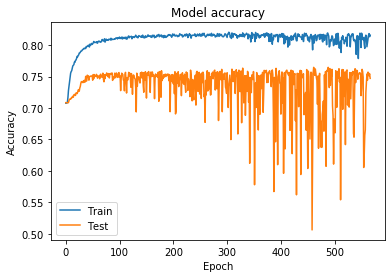

In [105]:
try:
    del history
except:
    pass
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss'
                                                  ,patience=200
                                                  ,min_delta = 0.01, verbose = 1)
model1_reg = model_one_reg()
history = model1_reg.fit(x_train ,y_train_bool ,epochs = 1000 ,validation_data=(x_val, y_val_bool)
              ,batch_size=1000 ,callbacks = [early_stopping])
#Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [106]:
model1_reg.evaluate(x_val ,y_val_bool)

98/98 [==============================] - 0s 3ms/step - loss: 0.5778 - accuracy: 0.7470


[0.577822744846344, 0.7470494508743286]

# Model 1 L1:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                3480      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
10/10 [==============================] - 1s 32ms/step - loss: 4.1705 - accuracy: 0.5962 - val_loss: 3.3674 - val_accuracy: 0.7085
Epoch 2/1000
10/10 [==============================] - 0s 14ms/step - loss: 3.1630 - accuracy: 0.7034 - val_loss: 2.5525 - val_accuracy: 0.7085
Epoch 3/1000
10/10 [==============================] - 0s 15ms/step - loss: 2.3758 - accuracy: 0.7063 - val_loss: 1.8982 - val_accuracy: 0.7110
Epoch 4/1000
10/10 [==============================] - 0s 14ms/step - loss: 1.7411 - acc

Epoch 54/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5517 - accuracy: 0.7665 - val_loss: 0.6893 - val_accuracy: 0.7183
Epoch 55/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5515 - accuracy: 0.7648 - val_loss: 0.6518 - val_accuracy: 0.7254
Epoch 56/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5533 - accuracy: 0.7677 - val_loss: 0.6505 - val_accuracy: 0.7266
Epoch 57/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.5520 - accuracy: 0.7682 - val_loss: 0.6649 - val_accuracy: 0.7234
Epoch 58/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5522 - accuracy: 0.7624 - val_loss: 0.6756 - val_accuracy: 0.7215
Epoch 59/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.5478 - accuracy: 0.7726 - val_loss: 0.6947 - val_accuracy: 0.7193
Epoch 60/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5487 - accuracy: 0.7667 - val_loss: 0.6818 - val_accuracy:

Epoch 111/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5213 - accuracy: 0.7977 - val_loss: 0.7395 - val_accuracy: 0.7301
Epoch 112/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5191 - accuracy: 0.8043 - val_loss: 0.8139 - val_accuracy: 0.7206
Epoch 113/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5186 - accuracy: 0.7976 - val_loss: 0.7891 - val_accuracy: 0.7238
Epoch 114/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.5161 - accuracy: 0.7989 - val_loss: 0.7580 - val_accuracy: 0.7279
Epoch 115/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5172 - accuracy: 0.8033 - val_loss: 0.7003 - val_accuracy: 0.7343
Epoch 116/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5206 - accuracy: 0.8039 - val_loss: 0.7222 - val_accuracy: 0.7327
Epoch 117/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5165 - accuracy: 0.8052 - val_loss: 0.7572 - val_ac

10/10 [==============================] - 0s 14ms/step - loss: 0.5091 - accuracy: 0.8043 - val_loss: 0.7443 - val_accuracy: 0.7333
Epoch 168/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5060 - accuracy: 0.8032 - val_loss: 0.7851 - val_accuracy: 0.7295
Epoch 169/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5099 - accuracy: 0.8013 - val_loss: 0.7356 - val_accuracy: 0.7340
Epoch 170/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5093 - accuracy: 0.8055 - val_loss: 0.7198 - val_accuracy: 0.7346
Epoch 171/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5076 - accuracy: 0.8028 - val_loss: 0.6665 - val_accuracy: 0.7388
Epoch 172/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5066 - accuracy: 0.8053 - val_loss: 0.8234 - val_accuracy: 0.7254
Epoch 173/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5098 - accuracy: 0.7981 - val_loss: 0.7804 - val_accuracy: 0.7311


10/10 [==============================] - 0s 14ms/step - loss: 0.4995 - accuracy: 0.8048 - val_loss: 0.7151 - val_accuracy: 0.7362
Epoch 224/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5014 - accuracy: 0.8066 - val_loss: 0.8592 - val_accuracy: 0.7254
Epoch 225/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4948 - accuracy: 0.8106 - val_loss: 0.8452 - val_accuracy: 0.7254
Epoch 226/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5045 - accuracy: 0.8028 - val_loss: 0.6304 - val_accuracy: 0.7474
Epoch 227/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5059 - accuracy: 0.7996 - val_loss: 0.6792 - val_accuracy: 0.7368
Epoch 228/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4991 - accuracy: 0.8095 - val_loss: 0.7106 - val_accuracy: 0.7365
Epoch 229/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5054 - accuracy: 0.8023 - val_loss: 0.7550 - val_accuracy: 0.7346


10/10 [==============================] - 0s 14ms/step - loss: 0.4901 - accuracy: 0.8075 - val_loss: 0.6900 - val_accuracy: 0.7391
Epoch 280/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4960 - accuracy: 0.8041 - val_loss: 0.8074 - val_accuracy: 0.7321
Epoch 281/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5006 - accuracy: 0.7954 - val_loss: 0.6845 - val_accuracy: 0.7391
Epoch 282/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4978 - accuracy: 0.8012 - val_loss: 0.6341 - val_accuracy: 0.7464
Epoch 283/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4958 - accuracy: 0.8062 - val_loss: 0.6674 - val_accuracy: 0.7423
Epoch 284/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4940 - accuracy: 0.8053 - val_loss: 0.6371 - val_accuracy: 0.7474
Epoch 285/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.4965 - accuracy: 0.8054 - val_loss: 0.6200 - val_accuracy: 0.7528


10/10 [==============================] - 0s 14ms/step - loss: 0.4868 - accuracy: 0.8102 - val_loss: 0.6987 - val_accuracy: 0.7404
Epoch 336/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4841 - accuracy: 0.8099 - val_loss: 0.5874 - val_accuracy: 0.7640
Epoch 337/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4955 - accuracy: 0.8015 - val_loss: 0.6268 - val_accuracy: 0.7480
Epoch 338/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4954 - accuracy: 0.8030 - val_loss: 0.7411 - val_accuracy: 0.7368
Epoch 339/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4853 - accuracy: 0.8086 - val_loss: 0.5977 - val_accuracy: 0.7592
Epoch 340/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5229 - accuracy: 0.7805 - val_loss: 0.5928 - val_accuracy: 0.7624
Epoch 341/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.5495 - accuracy: 0.7632 - val_loss: 0.5909 - val_accuracy: 0.7604


10/10 [==============================] - 0s 14ms/step - loss: 0.5226 - accuracy: 0.7760 - val_loss: 0.5858 - val_accuracy: 0.7620
Epoch 392/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5081 - accuracy: 0.7992 - val_loss: 0.5820 - val_accuracy: 0.7652
Epoch 393/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5096 - accuracy: 0.7944 - val_loss: 0.7872 - val_accuracy: 0.7365
Epoch 394/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4903 - accuracy: 0.8043 - val_loss: 0.6451 - val_accuracy: 0.7442
Epoch 395/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4946 - accuracy: 0.8036 - val_loss: 0.8265 - val_accuracy: 0.7343
Epoch 396/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4879 - accuracy: 0.8120 - val_loss: 0.7745 - val_accuracy: 0.7362
Epoch 397/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4958 - accuracy: 0.8048 - val_loss: 1.1429 - val_accuracy: 0.7174


10/10 [==============================] - 0s 14ms/step - loss: 0.5468 - accuracy: 0.7661 - val_loss: 0.5736 - val_accuracy: 0.7681
Epoch 448/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5185 - accuracy: 0.7918 - val_loss: 0.6988 - val_accuracy: 0.7416
Epoch 449/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4977 - accuracy: 0.8025 - val_loss: 0.8427 - val_accuracy: 0.7343
Epoch 450/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5302 - accuracy: 0.7776 - val_loss: 0.7318 - val_accuracy: 0.7388
Epoch 451/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4881 - accuracy: 0.8114 - val_loss: 0.7167 - val_accuracy: 0.7400
Epoch 452/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4909 - accuracy: 0.8107 - val_loss: 0.6298 - val_accuracy: 0.7490
Epoch 453/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4950 - accuracy: 0.8034 - val_loss: 0.6338 - val_accuracy: 0.7474


10/10 [==============================] - 0s 14ms/step - loss: 0.5205 - accuracy: 0.7884 - val_loss: 0.5720 - val_accuracy: 0.7697
Epoch 504/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5182 - accuracy: 0.7868 - val_loss: 0.5836 - val_accuracy: 0.7633
Epoch 505/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5020 - accuracy: 0.8001 - val_loss: 0.7298 - val_accuracy: 0.7404
Epoch 506/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4862 - accuracy: 0.8082 - val_loss: 0.5807 - val_accuracy: 0.7662
Epoch 507/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5114 - accuracy: 0.7844 - val_loss: 0.5686 - val_accuracy: 0.7694
Epoch 508/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5079 - accuracy: 0.7895 - val_loss: 0.7142 - val_accuracy: 0.7419
Epoch 509/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4819 - accuracy: 0.8117 - val_loss: 0.6751 - val_accuracy: 0.7442


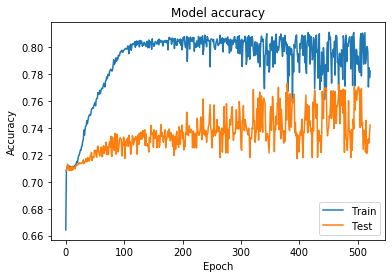

In [107]:
try:
    del history
except:
    pass
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss'
                                                  ,patience=200
                                                  ,min_delta = 0.01, verbose = 1)
model1_reg = model_one_reg('l1')
history = model1_reg.fit(x_train ,y_train_bool ,epochs = 1000 ,validation_data=(x_val, y_val_bool)
              ,batch_size=1000 ,callbacks = [early_stopping])
#Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [108]:
model1_reg.evaluate(x_val ,y_val_bool)

98/98 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.7423


[0.6749976873397827, 0.7422647476196289]

# Model 4 L2:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                3480      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                410       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 3,901
Trainable params: 3,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
10/10 [==============================] - 1s 34ms/step - loss: 1.4206 - accuracy: 0.5101 - val_loss: 1.2448 - val_accuracy: 0.7085
Epoch 2/1000
10/10 [==============================] - 0s 15ms/step - loss: 1.2265 - accuracy: 0.7062 - val_loss: 1.1719 - val_accuracy: 0.7085
Epoch 3/1000
10/10 [==============================] - 0s 15ms/step - loss: 1.1591 - accuracy: 0.70

Epoch 53/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5691 - accuracy: 0.7150 - val_loss: 0.6084 - val_accuracy: 0.7142
Epoch 54/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5667 - accuracy: 0.7156 - val_loss: 0.6094 - val_accuracy: 0.7142
Epoch 55/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5628 - accuracy: 0.7174 - val_loss: 0.6127 - val_accuracy: 0.7145
Epoch 56/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5688 - accuracy: 0.7111 - val_loss: 0.6118 - val_accuracy: 0.7142
Epoch 57/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5580 - accuracy: 0.7218 - val_loss: 0.6074 - val_accuracy: 0.7161
Epoch 58/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5552 - accuracy: 0.7296 - val_loss: 0.6087 - val_accuracy: 0.7152
Epoch 59/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5594 - accuracy: 0.7246 - val_loss: 0.6133 - val_accuracy:

Epoch 110/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5082 - accuracy: 0.7801 - val_loss: 0.6005 - val_accuracy: 0.7340
Epoch 111/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5109 - accuracy: 0.7769 - val_loss: 0.6046 - val_accuracy: 0.7292
Epoch 112/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5094 - accuracy: 0.7789 - val_loss: 0.5969 - val_accuracy: 0.7378
Epoch 113/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5099 - accuracy: 0.7817 - val_loss: 0.5984 - val_accuracy: 0.7448
Epoch 114/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5102 - accuracy: 0.7808 - val_loss: 0.6001 - val_accuracy: 0.7327
Epoch 115/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5080 - accuracy: 0.7792 - val_loss: 0.6069 - val_accuracy: 0.7292
Epoch 116/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5101 - accuracy: 0.7739 - val_loss: 0.5953 - val_ac

10/10 [==============================] - 0s 14ms/step - loss: 0.5233 - accuracy: 0.7646 - val_loss: 0.5940 - val_accuracy: 0.7410
Epoch 167/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4950 - accuracy: 0.7820 - val_loss: 0.6831 - val_accuracy: 0.7193
Epoch 168/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5053 - accuracy: 0.7825 - val_loss: 0.6589 - val_accuracy: 0.6919
Epoch 169/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5307 - accuracy: 0.7617 - val_loss: 0.6013 - val_accuracy: 0.7388
Epoch 170/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5214 - accuracy: 0.7682 - val_loss: 0.6791 - val_accuracy: 0.6679
Epoch 171/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5210 - accuracy: 0.7671 - val_loss: 0.5926 - val_accuracy: 0.7451
Epoch 172/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5004 - accuracy: 0.7882 - val_loss: 0.5869 - val_accuracy: 0.7461


10/10 [==============================] - 0s 14ms/step - loss: 0.4971 - accuracy: 0.7862 - val_loss: 0.5862 - val_accuracy: 0.7423
Epoch 223/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4910 - accuracy: 0.7858 - val_loss: 0.6157 - val_accuracy: 0.7273
Epoch 224/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5153 - accuracy: 0.7723 - val_loss: 0.6005 - val_accuracy: 0.7337
Epoch 225/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5121 - accuracy: 0.7778 - val_loss: 0.6236 - val_accuracy: 0.7190
Epoch 226/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5185 - accuracy: 0.7737 - val_loss: 0.6376 - val_accuracy: 0.7097
Epoch 227/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5194 - accuracy: 0.7679 - val_loss: 0.5861 - val_accuracy: 0.7467
Epoch 228/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4884 - accuracy: 0.7942 - val_loss: 0.5847 - val_accuracy: 0.7442


10/10 [==============================] - 0s 14ms/step - loss: 0.4886 - accuracy: 0.7896 - val_loss: 0.6312 - val_accuracy: 0.7292
Epoch 279/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5327 - accuracy: 0.7585 - val_loss: 0.6364 - val_accuracy: 0.7289
Epoch 280/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5102 - accuracy: 0.7730 - val_loss: 0.5800 - val_accuracy: 0.7496
Epoch 281/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4804 - accuracy: 0.7985 - val_loss: 0.5798 - val_accuracy: 0.7499
Epoch 282/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4828 - accuracy: 0.7960 - val_loss: 0.6101 - val_accuracy: 0.7301
Epoch 283/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5182 - accuracy: 0.7750 - val_loss: 0.6991 - val_accuracy: 0.6453
Epoch 284/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5940 - accuracy: 0.7196 - val_loss: 0.6996 - val_accuracy: 0.6463


10/10 [==============================] - 0s 14ms/step - loss: 0.5145 - accuracy: 0.7730 - val_loss: 0.5889 - val_accuracy: 0.7416
Epoch 335/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.4830 - accuracy: 0.7949 - val_loss: 0.6401 - val_accuracy: 0.7273
Epoch 336/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5568 - accuracy: 0.7436 - val_loss: 0.6141 - val_accuracy: 0.7359
Epoch 337/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5068 - accuracy: 0.7746 - val_loss: 0.6618 - val_accuracy: 0.7241
Epoch 338/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5161 - accuracy: 0.7710 - val_loss: 0.5814 - val_accuracy: 0.7496
Epoch 339/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5061 - accuracy: 0.7801 - val_loss: 0.6507 - val_accuracy: 0.6947
Epoch 340/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5333 - accuracy: 0.7602 - val_loss: 0.6084 - val_accuracy: 0.7321


10/10 [==============================] - 0s 14ms/step - loss: 0.4871 - accuracy: 0.7910 - val_loss: 0.5889 - val_accuracy: 0.7410
Epoch 391/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.4840 - accuracy: 0.7948 - val_loss: 0.5882 - val_accuracy: 0.7413
Epoch 392/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.4835 - accuracy: 0.7882 - val_loss: 0.5986 - val_accuracy: 0.7394
Epoch 393/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5114 - accuracy: 0.7698 - val_loss: 0.6076 - val_accuracy: 0.7384
Epoch 394/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4823 - accuracy: 0.7850 - val_loss: 0.5793 - val_accuracy: 0.7451
Epoch 395/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4847 - accuracy: 0.7935 - val_loss: 0.6055 - val_accuracy: 0.7308
Epoch 396/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.4893 - accuracy: 0.7925 - val_loss: 0.8469 - val_accuracy: 0.4896


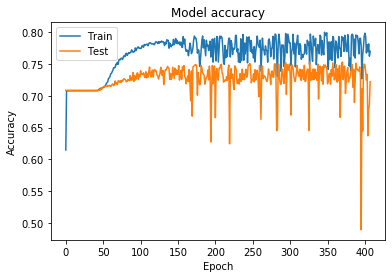

In [109]:
try:
    del history
except:
    pass
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss'
                                                  ,patience=200
                                                  ,min_delta = 0.01, verbose = 1)
model4_reg = model_four_reg()
history = model4_reg.fit(x_train ,y_train_bool ,epochs = 1000 ,validation_data=(x_val, y_val_bool)
              ,batch_size=1000 ,callbacks = [early_stopping])
#Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [110]:
model4_reg.evaluate(x_val ,y_val_bool)

98/98 [==============================] - 0s 3ms/step - loss: 0.6177 - accuracy: 0.7219


[0.6177325248718262, 0.7218500971794128]

# Model 4 L1:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                3480      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                410       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 3,901
Trainable params: 3,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
10/10 [==============================] - 1s 34ms/step - loss: 4.7599 - accuracy: 0.7076 - val_loss: 3.9440 - val_accuracy: 0.7085
Epoch 2/1000
10/10 [==============================] - 0s 15ms/step - loss: 3.7125 - accuracy: 0.7096 - val_loss: 3.0319 - val_accuracy: 0.7085
Epoch 3/1000
10/10 [==============================] - 0s 16ms/step - loss: 2.8373 - accuracy: 0.71

Epoch 53/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.6580 - accuracy: 0.7124 - val_loss: 0.6611 - val_accuracy: 0.7085
Epoch 54/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.6615 - accuracy: 0.7082 - val_loss: 0.6611 - val_accuracy: 0.7085
Epoch 55/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.6650 - accuracy: 0.7041 - val_loss: 0.6610 - val_accuracy: 0.7085
Epoch 56/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.6662 - accuracy: 0.7028 - val_loss: 0.6613 - val_accuracy: 0.7085
Epoch 57/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.6590 - accuracy: 0.7109 - val_loss: 0.6613 - val_accuracy: 0.7085
Epoch 58/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.6611 - accuracy: 0.7086 - val_loss: 0.6610 - val_accuracy: 0.7085
Epoch 59/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.6651 - accuracy: 0.7040 - val_loss: 0.6612 - val_accuracy:

Epoch 110/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.6595 - accuracy: 0.7104 - val_loss: 0.6612 - val_accuracy: 0.7085
Epoch 111/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.6566 - accuracy: 0.7137 - val_loss: 0.6612 - val_accuracy: 0.7085
Epoch 112/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.6596 - accuracy: 0.7102 - val_loss: 0.6613 - val_accuracy: 0.7085
Epoch 113/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.6661 - accuracy: 0.7027 - val_loss: 0.6613 - val_accuracy: 0.7085
Epoch 114/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.6592 - accuracy: 0.7107 - val_loss: 0.6612 - val_accuracy: 0.7085
Epoch 115/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.6644 - accuracy: 0.7048 - val_loss: 0.6614 - val_accuracy: 0.7085
Epoch 116/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.6644 - accuracy: 0.7050 - val_loss: 0.6613 - val_ac

10/10 [==============================] - 0s 14ms/step - loss: 0.6581 - accuracy: 0.7120 - val_loss: 0.6614 - val_accuracy: 0.7085
Epoch 167/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.6612 - accuracy: 0.7087 - val_loss: 0.6613 - val_accuracy: 0.7085
Epoch 168/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.6635 - accuracy: 0.7058 - val_loss: 0.6613 - val_accuracy: 0.7085
Epoch 169/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.6607 - accuracy: 0.7091 - val_loss: 0.6613 - val_accuracy: 0.7085
Epoch 170/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.6660 - accuracy: 0.7029 - val_loss: 0.6615 - val_accuracy: 0.7085
Epoch 171/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.6591 - accuracy: 0.7108 - val_loss: 0.6613 - val_accuracy: 0.7085
Epoch 172/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.6616 - accuracy: 0.7081 - val_loss: 0.6613 - val_accuracy: 0.7085


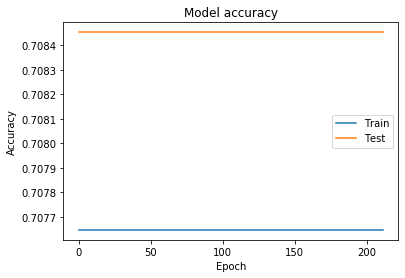

In [111]:
try:
    del history
except:
    pass
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss'
                                                  ,patience=200
                                                  ,min_delta = 0.01, verbose = 1)
model4_reg = model_four_reg('l1')
history = model4_reg.fit(x_train ,y_train_bool ,epochs = 1000 ,validation_data=(x_val, y_val_bool)
              ,batch_size=1000 ,callbacks = [early_stopping])
#Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [112]:
model4_reg.evaluate(x_val ,y_val_bool)

98/98 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.7085


[0.6611018776893616, 0.7084529399871826]

It appears that L1 is more sensitive than L2. Since L1 tends to shrink coefficients to zero, the absence of features causes a more drastic change in the performance of a model.

# Adding dropout to best two models:

In [113]:
#adding a dropout layer
def model_one_reg_dropout(reg='l2'):
    tf.keras.backend.clear_session()
    model1 = Sequential()
    model1.add(Dense(40 ,input_shape=(86,) ,activation='sigmoid' ,kernel_regularizer=reg))
    model1.add(Dropout(0.2))
    model1.add(Dense(1 ,activation='sigmoid'))
    model1.compile(optimizer='sgd' ,loss='binary_crossentropy' ,metrics=['accuracy'])
    K.set_value(model1.optimizer.learning_rate, .3)
    model1.summary()
    
    return model1

#added hidden layer
#adding a dropout layer
def model_four_reg_dropout(reg='l2'):   
    tf.keras.backend.clear_session()
    model1 = Sequential()
    model1.add(Dense(40 ,input_shape=(86,) ,activation='sigmoid' ,kernel_regularizer=reg))
    model1.add(Dropout(0.2))
    model1.add(Dense(10 ,input_shape=(20,) ,activation='sigmoid' ,kernel_regularizer=reg))
    model1.add(Dense(1 ,activation='sigmoid'))
    model1.compile(optimizer='sgd' ,loss='binary_crossentropy' ,metrics=['accuracy'])
    K.set_value(model1.optimizer.learning_rate, .3)
    model1.summary()

    return model1

# Model 1 L2 dropout:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                3480      
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
10/10 [==============================] - 1s 33ms/step - loss: 1.1350 - accuracy: 0.7027 - val_loss: 1.0779 - val_accuracy: 0.7085
Epoch 2/1000
10/10 [==============================] - 0s 16ms/step - loss: 1.0509 - accuracy: 0.7099 - val_loss: 1.0056 - val_accuracy: 0.7085
Epoch 3/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.9863 - accuracy: 0.70

Epoch 53/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.4967 - accuracy: 0.7661 - val_loss: 0.5555 - val_accuracy: 0.7474
Epoch 54/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.4899 - accuracy: 0.7714 - val_loss: 0.5545 - val_accuracy: 0.7486
Epoch 55/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.4960 - accuracy: 0.7608 - val_loss: 0.5545 - val_accuracy: 0.7496
Epoch 56/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.5009 - accuracy: 0.7607 - val_loss: 0.5532 - val_accuracy: 0.7486
Epoch 57/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.5020 - accuracy: 0.7671 - val_loss: 0.5560 - val_accuracy: 0.7483
Epoch 58/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.4952 - accuracy: 0.7746 - val_loss: 0.5524 - val_accuracy: 0.7477
Epoch 59/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5006 - accuracy: 0.7597 - val_loss: 0.5545 - val_accuracy:

Epoch 110/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.4942 - accuracy: 0.7669 - val_loss: 0.5556 - val_accuracy: 0.7419
Epoch 111/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.4934 - accuracy: 0.7658 - val_loss: 0.5532 - val_accuracy: 0.7464
Epoch 112/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.4863 - accuracy: 0.7659 - val_loss: 0.5538 - val_accuracy: 0.7464
Epoch 113/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.4889 - accuracy: 0.7713 - val_loss: 0.5494 - val_accuracy: 0.7512
Epoch 114/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.4883 - accuracy: 0.7670 - val_loss: 0.5557 - val_accuracy: 0.7439
Epoch 115/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.4939 - accuracy: 0.7631 - val_loss: 0.5506 - val_accuracy: 0.7509
Epoch 116/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.4901 - accuracy: 0.7635 - val_loss: 0.5500 - val_ac

10/10 [==============================] - 0s 16ms/step - loss: 0.4928 - accuracy: 0.7657 - val_loss: 0.5617 - val_accuracy: 0.7404
Epoch 167/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.4873 - accuracy: 0.7703 - val_loss: 0.5581 - val_accuracy: 0.7435
Epoch 168/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.4960 - accuracy: 0.7641 - val_loss: 0.5533 - val_accuracy: 0.7426
Epoch 169/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.4948 - accuracy: 0.7620 - val_loss: 0.5550 - val_accuracy: 0.7423
Epoch 170/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.4879 - accuracy: 0.7715 - val_loss: 0.5473 - val_accuracy: 0.7518
Epoch 171/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.4883 - accuracy: 0.7666 - val_loss: 0.5542 - val_accuracy: 0.7410
Epoch 172/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.4858 - accuracy: 0.7703 - val_loss: 0.5502 - val_accuracy: 0.7483


10/10 [==============================] - 0s 15ms/step - loss: 0.4767 - accuracy: 0.7747 - val_loss: 0.5469 - val_accuracy: 0.7493
Epoch 223/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.4809 - accuracy: 0.7683 - val_loss: 0.5435 - val_accuracy: 0.7531
Epoch 224/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.4749 - accuracy: 0.7770 - val_loss: 0.5601 - val_accuracy: 0.7416
Epoch 225/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.4849 - accuracy: 0.7760 - val_loss: 0.5522 - val_accuracy: 0.7416
Epoch 00225: early stopping


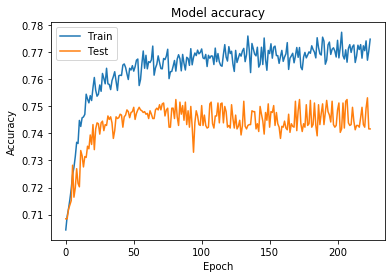

In [114]:
try:
    del history
except:
    pass
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss'
                                                  ,patience=200
                                                  ,min_delta = 0.05, verbose = 1)
model1_reg_drop = model_one_reg_dropout()
history = model1_reg_drop.fit(x_train ,y_train_bool ,epochs = 1000 ,validation_data=(x_val, y_val_bool)
              ,batch_size=1000 ,callbacks = [early_stopping])
#Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [115]:
model1_reg_drop.evaluate(x_val ,y_val_bool)

98/98 [==============================] - 0s 3ms/step - loss: 0.5522 - accuracy: 0.7416


[0.552169680595398, 0.7416267991065979]

In [116]:
from sklearn.metrics import confusion_matrix ,precision_recall_curve ,f1_score ,precision_score, recall_score

In [117]:
def plot_precision_recall_v_threshold(precisions ,recalls ,thresholds):
    plt.plot(thresholds ,precisions[:-1] ,'b--' ,label="Precision")
    plt.plot(thresholds ,recalls[:-1] ,'g-' ,label='Recall')
    plt.xlabel('threshold')
    plt.legend(loc='center left')
    plt.ylim([0,1])

In [118]:
y_pred = np.round(model1_reg_drop.predict(x_train)).astype(int)
print(confusion_matrix(y_train_bool ,y_pred))
print(precision_score(y_train_bool ,y_pred))
print(recall_score(y_train_bool ,y_pred))
print(f1_score(y_train_bool, y_pred))

[[1316 1433]
 [ 503 6151]]
0.8110495780590717
0.9244063721070033
0.8640258463267312


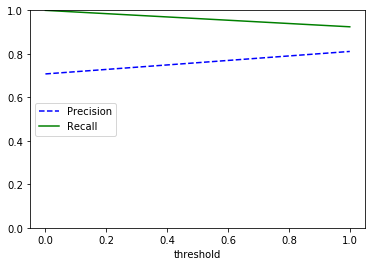

In [119]:
precisions ,recalls ,thresholds = precision_recall_curve(y_train_bool ,y_pred)
plot_precision_recall_v_threshold(precisions ,recalls ,thresholds)
plt.show()

# Model 4 L2 dropout:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                3480      
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                410       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 3,901
Trainable params: 3,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
10/10 [==============================] - 1s 35ms/step - loss: 1.2881 - accuracy: 0.7085 - val_loss: 1.2315 - val_accuracy: 0.7085
Epoch 2/1000
10/10 [==============================] - 0s 16ms/step - loss: 1.2068 - accuracy: 0.7108 - val_lo

Epoch 52/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.5750 - accuracy: 0.7199 - val_loss: 0.6111 - val_accuracy: 0.7142
Epoch 53/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5624 - accuracy: 0.7270 - val_loss: 0.6098 - val_accuracy: 0.7139
Epoch 54/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.5675 - accuracy: 0.7255 - val_loss: 0.6166 - val_accuracy: 0.7145
Epoch 55/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.5726 - accuracy: 0.7232 - val_loss: 0.6155 - val_accuracy: 0.7142
Epoch 56/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.5640 - accuracy: 0.7295 - val_loss: 0.6090 - val_accuracy: 0.7152
Epoch 57/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5625 - accuracy: 0.7327 - val_loss: 0.6127 - val_accuracy: 0.7142
Epoch 58/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5622 - accuracy: 0.7317 - val_loss: 0.6076 - val_accuracy:

Epoch 109/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5406 - accuracy: 0.7514 - val_loss: 0.5959 - val_accuracy: 0.7333
Epoch 110/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.5431 - accuracy: 0.7480 - val_loss: 0.5986 - val_accuracy: 0.7247
Epoch 111/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5347 - accuracy: 0.7550 - val_loss: 0.5980 - val_accuracy: 0.7250
Epoch 112/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5400 - accuracy: 0.7580 - val_loss: 0.6056 - val_accuracy: 0.7215
Epoch 113/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5377 - accuracy: 0.7537 - val_loss: 0.6086 - val_accuracy: 0.7212
Epoch 114/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5391 - accuracy: 0.7552 - val_loss: 0.6059 - val_accuracy: 0.7219
Epoch 115/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5392 - accuracy: 0.7551 - val_loss: 0.6006 - val_ac

10/10 [==============================] - 0s 15ms/step - loss: 0.5288 - accuracy: 0.7561 - val_loss: 0.5871 - val_accuracy: 0.7340
Epoch 166/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5237 - accuracy: 0.7574 - val_loss: 0.5994 - val_accuracy: 0.7228
Epoch 167/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5348 - accuracy: 0.7502 - val_loss: 0.5867 - val_accuracy: 0.7352
Epoch 168/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.5257 - accuracy: 0.7621 - val_loss: 0.5976 - val_accuracy: 0.7254
Epoch 169/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5247 - accuracy: 0.7586 - val_loss: 0.5907 - val_accuracy: 0.7270
Epoch 170/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5285 - accuracy: 0.7568 - val_loss: 0.5870 - val_accuracy: 0.7327
Epoch 171/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5279 - accuracy: 0.7592 - val_loss: 0.5982 - val_accuracy: 0.7241


10/10 [==============================] - 0s 16ms/step - loss: 0.5166 - accuracy: 0.7642 - val_loss: 0.5820 - val_accuracy: 0.7333
Epoch 222/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5261 - accuracy: 0.7598 - val_loss: 0.5918 - val_accuracy: 0.7423
Epoch 223/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.5292 - accuracy: 0.7538 - val_loss: 0.5813 - val_accuracy: 0.7407
Epoch 224/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5218 - accuracy: 0.7608 - val_loss: 0.5842 - val_accuracy: 0.7451
Epoch 225/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.5267 - accuracy: 0.7604 - val_loss: 0.5867 - val_accuracy: 0.7305
Epoch 226/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5242 - accuracy: 0.7584 - val_loss: 0.5880 - val_accuracy: 0.7279
Epoch 227/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5194 - accuracy: 0.7666 - val_loss: 0.5821 - val_accuracy: 0.7426


10/10 [==============================] - 0s 16ms/step - loss: 0.5120 - accuracy: 0.7675 - val_loss: 0.5788 - val_accuracy: 0.7435
Epoch 278/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5233 - accuracy: 0.7652 - val_loss: 0.5776 - val_accuracy: 0.7423
Epoch 279/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5126 - accuracy: 0.7676 - val_loss: 0.5776 - val_accuracy: 0.7397
Epoch 280/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5166 - accuracy: 0.7682 - val_loss: 0.5839 - val_accuracy: 0.7426
Epoch 281/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5188 - accuracy: 0.7554 - val_loss: 0.6097 - val_accuracy: 0.7222
Epoch 282/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5345 - accuracy: 0.7497 - val_loss: 0.5775 - val_accuracy: 0.7394
Epoch 283/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.5128 - accuracy: 0.7626 - val_loss: 0.5818 - val_accuracy: 0.7340


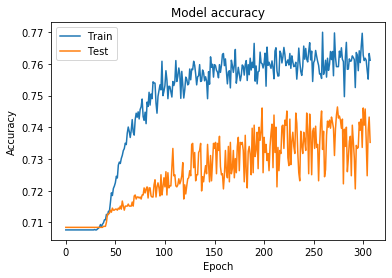

In [120]:
try:
    del history
except:
    pass
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss'
                                                  ,patience=200
                                                  ,min_delta = 0.05, verbose = 1)
model4_reg_drop = model_four_reg_dropout()
history = model4_reg_drop.fit(x_train ,y_train_bool ,epochs = 1000 ,validation_data=(x_val, y_val_bool)
              ,batch_size=1000 ,callbacks = [early_stopping])
#Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [121]:
model4_reg_drop.evaluate(x_val ,y_val_bool)

98/98 [==============================] - 0s 3ms/step - loss: 0.5779 - accuracy: 0.7352


[0.5778772234916687, 0.7352471947669983]

In [122]:
y_pred = np.round(model4_reg_drop.predict(x_train)).astype(int)
print(confusion_matrix(y_train_bool ,y_pred))
print(precision_score(y_train_bool ,y_pred))
print(recall_score(y_train_bool ,y_pred))
print(f1_score(y_train_bool, y_pred))

[[ 919 1830]
 [ 296 6358]]
0.7765021983390328
0.9555154794108807
0.8567578493464493


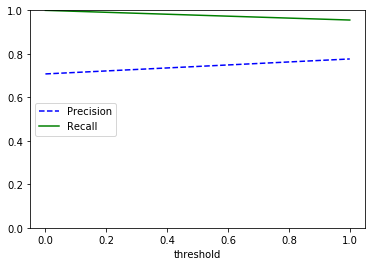

In [123]:
precisions ,recalls ,thresholds = precision_recall_curve(y_train_bool ,y_pred)
plot_precision_recall_v_threshold(precisions ,recalls ,thresholds)
plt.show()

# Model 1 cross validation:

In [124]:
try:
    del history
except:
    pass

conf_mat_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_per_fold = []
acc_per_fold = []
loss_per_fold = []
fold_no = 1

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy'
                                                  ,patience=200
                                                  ,min_delta = 0.05, verbose = 1)

for train, test in kfold.split(x_train_test_val, y_train_test_val):
    # Fit data to model
    model1_reg = model_one_reg()
    history = model1_reg.fit(x_train_test_val[train] ,y_train_test_val[train] 
            ,epochs = 1000 ,batch_size=1000 ,callbacks = [early_stopping])

    # Generate generalization metrics
    scores = model1_reg.evaluate(x_train_test_val[test] , y_train_test_val[test] , verbose=0)
    print(f'Score for fold {fold_no}: {model1_reg.metrics_names[0]} of {scores[0]}; \
    {model1_reg.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    y_pred = np.round(model1_reg.predict(x_train_test_val[train])).astype(int)
    conf_mat_per_fold.append(confusion_matrix(y_train_test_val[train]  ,y_pred))
    precision_per_fold.append(precision_score(y_train_test_val[train] ,y_pred))
    recall_per_fold.append(recall_score(y_train_test_val[train] ,y_pred))
    f1_per_fold.append(f1_score(y_train_test_val[train], y_pred))

    # Increase fold number
    fold_no = fold_no + 1
    
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
    print(f'> Fold {i+1} - Confusion Matrix: {conf_mat_per_fold[i]} \
    - Precision: {precision_per_fold[i]}% \
    - Recall: {recall_per_fold[i]}% \
    - F1: {f1_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> Precision: {np.mean(precision_per_fold)}')
print(f'> Recall: {np.mean(recall_per_fold)}')
print(f'> F1: {np.mean(f1_per_fold)}')
print('--------------------------')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                3480      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
13/13 [==============================] - 0s 6ms/step - loss: 1.1785 - accuracy: 0.6047
Epoch 2/1000
13/13 [==============================] - 0s 7ms/step - loss: 1.0380 - accuracy: 0.7048
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.9486 - accuracy: 0.7154
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.8828 - accuracy: 0.7172
Epoch 5/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.8185 - accuracy: 0.7228
Epoch 6/1000
13/

13/13 [==============================] - 0s 6ms/step - loss: 0.4586 - accuracy: 0.7886
Epoch 77/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5277 - accuracy: 0.7497
Epoch 78/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4855 - accuracy: 0.7718
Epoch 79/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4716 - accuracy: 0.7822
Epoch 80/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4588 - accuracy: 0.7929
Epoch 81/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4569 - accuracy: 0.7891
Epoch 82/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4572 - accuracy: 0.7911
Epoch 83/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4695 - accuracy: 0.7845
Epoch 84/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4838 - accuracy: 0.7765
Epoch 85/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4486 - accuracy: 0.7959
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.4809 - accuracy: 0.7741
Epoch 157/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4438 - accuracy: 0.8052
Epoch 158/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4686 - accuracy: 0.7786
Epoch 159/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4664 - accuracy: 0.7871
Epoch 160/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4756 - accuracy: 0.7763
Epoch 161/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4573 - accuracy: 0.7958
Epoch 162/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4605 - accuracy: 0.7917
Epoch 163/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4584 - accuracy: 0.7930
Epoch 164/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4772 - accuracy: 0.7757
Epoch 165/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4798 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.6498 - accuracy: 0.7526
Epoch 10/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.6237 - accuracy: 0.7559
Epoch 11/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.6017 - accuracy: 0.7556
Epoch 12/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5809 - accuracy: 0.7586
Epoch 13/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5663 - accuracy: 0.7605
Epoch 14/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5485 - accuracy: 0.7659
Epoch 15/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5394 - accuracy: 0.7686
Epoch 16/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5325 - accuracy: 0.7660
Epoch 17/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5257 - accuracy: 0.7659
Epoch 18/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5242 - accuracy: 0.7617
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.4511 - accuracy: 0.7992
Epoch 91/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4940 - accuracy: 0.7675
Epoch 92/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4528 - accuracy: 0.7928
Epoch 93/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5092 - accuracy: 0.7594
Epoch 94/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4506 - accuracy: 0.7987
Epoch 95/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5036 - accuracy: 0.7618
Epoch 96/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4727 - accuracy: 0.7790
Epoch 97/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4733 - accuracy: 0.7778
Epoch 98/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4684 - accuracy: 0.7854
Epoch 99/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4694 - accuracy: 0.7841
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.4678 - accuracy: 0.7750
Epoch 171/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4466 - accuracy: 0.8019
Epoch 172/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4960 - accuracy: 0.7617
Epoch 173/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4591 - accuracy: 0.7860
Epoch 174/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4821 - accuracy: 0.7778
Epoch 175/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4574 - accuracy: 0.7935
Epoch 176/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4981 - accuracy: 0.7625
Epoch 177/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4604 - accuracy: 0.7901
Epoch 178/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4581 - accuracy: 0.7914
Epoch 179/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4791 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.4778 - accuracy: 0.7819
Epoch 25/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4811 - accuracy: 0.7776
Epoch 26/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4984 - accuracy: 0.7654
Epoch 27/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4739 - accuracy: 0.7823
Epoch 28/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4829 - accuracy: 0.7746
Epoch 29/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4799 - accuracy: 0.7753
Epoch 30/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4886 - accuracy: 0.7694
Epoch 31/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4722 - accuracy: 0.7827
Epoch 32/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4859 - accuracy: 0.7762
Epoch 33/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4931 - accuracy: 0.7709
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.4476 - accuracy: 0.7931
Epoch 106/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4719 - accuracy: 0.7812
Epoch 107/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4728 - accuracy: 0.7805
Epoch 108/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4487 - accuracy: 0.7993
Epoch 109/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4481 - accuracy: 0.7961
Epoch 110/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4603 - accuracy: 0.7925
Epoch 111/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4934 - accuracy: 0.7662
Epoch 112/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4786 - accuracy: 0.7714
Epoch 113/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4618 - accuracy: 0.7877
Epoch 114/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4571 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.4512 - accuracy: 0.7977
Epoch 186/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4561 - accuracy: 0.7945
Epoch 187/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4646 - accuracy: 0.7895
Epoch 188/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4511 - accuracy: 0.8008
Epoch 189/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4798 - accuracy: 0.7732
Epoch 190/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4443 - accuracy: 0.7976
Epoch 191/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4690 - accuracy: 0.7868
Epoch 192/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4626 - accuracy: 0.7882
Epoch 193/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4499 - accuracy: 0.7996
Epoch 194/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5079 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.4628 - accuracy: 0.7846
Epoch 37/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4831 - accuracy: 0.7706
Epoch 38/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4621 - accuracy: 0.7841
Epoch 39/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4987 - accuracy: 0.7639
Epoch 40/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4812 - accuracy: 0.7787
Epoch 41/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4704 - accuracy: 0.7835
Epoch 42/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4789 - accuracy: 0.7811
Epoch 43/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4922 - accuracy: 0.7669
Epoch 44/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4951 - accuracy: 0.7702
Epoch 45/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4568 - accuracy: 0.7844
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.4488 - accuracy: 0.7962
Epoch 118/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4635 - accuracy: 0.7868
Epoch 119/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4875 - accuracy: 0.7735
Epoch 120/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4556 - accuracy: 0.7971
Epoch 121/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4878 - accuracy: 0.7756
Epoch 122/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4521 - accuracy: 0.7938
Epoch 123/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4383 - accuracy: 0.8041
Epoch 124/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4970 - accuracy: 0.7648
Epoch 125/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4727 - accuracy: 0.7826
Epoch 126/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4407 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.4637 - accuracy: 0.7878
Epoch 198/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4497 - accuracy: 0.7929
Epoch 199/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4731 - accuracy: 0.7778
Epoch 200/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4588 - accuracy: 0.7911
Epoch 201/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4564 - accuracy: 0.7906
Epoch 202/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4454 - accuracy: 0.7986
Epoch 203/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4797 - accuracy: 0.7734
Epoch 204/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4475 - accuracy: 0.7975
Epoch 205/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4484 - accuracy: 0.7971
Epoch 206/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4414 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.5078 - accuracy: 0.7535
Epoch 60/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4616 - accuracy: 0.7881
Epoch 61/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4782 - accuracy: 0.7790
Epoch 62/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4693 - accuracy: 0.7875
Epoch 63/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4924 - accuracy: 0.7689
Epoch 64/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4859 - accuracy: 0.7702
Epoch 65/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4589 - accuracy: 0.7875
Epoch 66/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4552 - accuracy: 0.7927
Epoch 67/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4988 - accuracy: 0.7668
Epoch 68/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4999 - accuracy: 0.7660
Epoc

13/13 [==============================] - 0s 7ms/step - loss: 0.4684 - accuracy: 0.7884
Epoch 140/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4636 - accuracy: 0.7924
Epoch 141/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4635 - accuracy: 0.7915
Epoch 142/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4903 - accuracy: 0.7725
Epoch 143/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4440 - accuracy: 0.8016
Epoch 144/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5059 - accuracy: 0.7560
Epoch 145/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4448 - accuracy: 0.8038
Epoch 146/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5029 - accuracy: 0.7637
Epoch 147/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4575 - accuracy: 0.7965
Epoch 148/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4528 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.4989 - accuracy: 0.7655
Epoch 220/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4440 - accuracy: 0.8028
Epoch 221/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4636 - accuracy: 0.7835
Epoch 222/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4509 - accuracy: 0.7975
Epoch 223/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4643 - accuracy: 0.7838
Epoch 224/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4560 - accuracy: 0.7894
Epoch 225/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4549 - accuracy: 0.7979
Epoch 226/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4529 - accuracy: 0.7925
Epoch 227/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4530 - accuracy: 0.7988
Epoch 228/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4743 - accuracy: 0.

# Model 4 Cross Validation:

In [125]:
try:
    del history
except:
    pass

conf_mat_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_per_fold = []
acc_per_fold = []
loss_per_fold = []
fold_no = 1

for train, test in kfold.split(x_train_test_val, y_train_test_val):
    # Fit data to model
    model4_reg = model_four_reg()
    history = model4_reg.fit(x_train_test_val[train] ,y_train_test_val[train] 
            ,epochs = 1000 ,batch_size=1000 ,callbacks = [early_stopping])

    # Generate generalization metrics
    scores = model4_reg.evaluate(x_train_test_val[test] , y_train_test_val[test] , verbose=0)
    print(f'Score for fold {fold_no}: {model4_reg.metrics_names[0]} of {scores[0]}; \
    {model4_reg.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    y_pred = np.round(model1_reg.predict(x_train_test_val[train])).astype(int)
    conf_mat_per_fold.append(confusion_matrix(y_train_test_val[train]  ,y_pred))
    precision_per_fold.append(precision_score(y_train_test_val[train] ,y_pred))
    recall_per_fold.append(recall_score(y_train_test_val[train] ,y_pred))
    f1_per_fold.append(f1_score(y_train_test_val[train], y_pred))

    # Increase fold number
    fold_no = fold_no + 1
    
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
    print(f'> Fold {i+1} - Confusion Matrix: {conf_mat_per_fold[i]} \
    - Precision: {precision_per_fold[i]}% \
    - Precision: {recall_per_fold[i]}% \
    - Precision: {f1_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> Precision: {np.mean(precision_per_fold)}')
print(f'> Recall: {np.mean(recall_per_fold)}')
print(f'> F1: {np.mean(f1_per_fold)}')
print('--------------------------')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                3480      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                410       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 3,901
Trainable params: 3,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
13/13 [==============================] - 1s 6ms/step - loss: 1.3022 - accuracy: 0.7117
Epoch 2/1000
13/13 [==============================] - 0s 7ms/step - loss: 1.1952 - accuracy: 0.7056
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 1.1050 - accuracy: 0.7088
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 1.0319 - a

13/13 [==============================] - 0s 6ms/step - loss: 0.5326 - accuracy: 0.7613
Epoch 75/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5290 - accuracy: 0.7705
Epoch 76/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5330 - accuracy: 0.7588
Epoch 77/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5282 - accuracy: 0.7637
Epoch 78/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5343 - accuracy: 0.7589
Epoch 79/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5254 - accuracy: 0.7689
Epoch 80/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5328 - accuracy: 0.7668
Epoch 81/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5291 - accuracy: 0.7669
Epoch 82/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5230 - accuracy: 0.7646
Epoch 83/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5286 - accuracy: 0.7669
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.5347 - accuracy: 0.7687
Epoch 155/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5164 - accuracy: 0.7729
Epoch 156/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5317 - accuracy: 0.7615
Epoch 157/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5742 - accuracy: 0.7468
Epoch 158/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5235 - accuracy: 0.7682
Epoch 159/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5671 - accuracy: 0.7498
Epoch 160/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5074 - accuracy: 0.7787
Epoch 161/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5575 - accuracy: 0.7522
Epoch 162/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5533 - accuracy: 0.7509
Epoch 163/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5328 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.5323 - accuracy: 0.7678
Epoch 235/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5211 - accuracy: 0.7686
Epoch 236/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5148 - accuracy: 0.7810
Epoch 237/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5115 - accuracy: 0.7744
Epoch 238/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5822 - accuracy: 0.7374
Epoch 239/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5631 - accuracy: 0.7521
Epoch 240/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5270 - accuracy: 0.7675
Epoch 241/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5590 - accuracy: 0.7530
Epoch 242/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5127 - accuracy: 0.7768
Epoch 243/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5358 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.5775 - accuracy: 0.7142
Epoch 42/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5759 - accuracy: 0.7145
Epoch 43/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5703 - accuracy: 0.7231
Epoch 44/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5737 - accuracy: 0.7175
Epoch 45/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5677 - accuracy: 0.7218
Epoch 46/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5607 - accuracy: 0.7305
Epoch 47/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5655 - accuracy: 0.7258
Epoch 48/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5631 - accuracy: 0.7300
Epoch 49/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5574 - accuracy: 0.7324
Epoch 50/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5497 - accuracy: 0.7386
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.5246 - accuracy: 0.7706
Epoch 123/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5397 - accuracy: 0.7595
Epoch 124/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5480 - accuracy: 0.7598
Epoch 125/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5130 - accuracy: 0.7702
Epoch 126/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5136 - accuracy: 0.7717
Epoch 127/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5948 - accuracy: 0.7364
Epoch 128/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5290 - accuracy: 0.7673
Epoch 129/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5169 - accuracy: 0.7754
Epoch 130/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5351 - accuracy: 0.7591
Epoch 131/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5554 - accuracy: 0.

13/13 [==============================] - 0s 7ms/step - loss: 0.5292 - accuracy: 0.7669
Epoch 203/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5543 - accuracy: 0.7490
Epoch 204/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5147 - accuracy: 0.7746
Epoch 205/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5415 - accuracy: 0.7633
Epoch 206/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5482 - accuracy: 0.7568
Epoch 207/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5283 - accuracy: 0.7658
Epoch 208/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5574 - accuracy: 0.7551
Epoch 209/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5305 - accuracy: 0.7672
Epoch 210/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5451 - accuracy: 0.7562
Epoch 211/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5571 - accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.9647 - accuracy: 0.7039
Epoch 6/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.9086 - accuracy: 0.7072
Epoch 7/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.8604 - accuracy: 0.7108
Epoch 8/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.8230 - accuracy: 0.7095
Epoch 9/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7935 - accuracy: 0.7051
Epoch 10/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7645 - accuracy: 0.7068
Epoch 11/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7390 - accuracy: 0.7079
Epoch 12/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7182 - accuracy: 0.7092
Epoch 13/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7011 - accuracy: 0.7082
Epoch 14/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.6899 - accuracy: 0.7046
Epoch 15

13/13 [==============================] - 0s 6ms/step - loss: 0.5276 - accuracy: 0.7632
Epoch 87/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5243 - accuracy: 0.7658
Epoch 88/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5225 - accuracy: 0.7666
Epoch 89/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5232 - accuracy: 0.7666
Epoch 90/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5198 - accuracy: 0.7706
Epoch 91/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5191 - accuracy: 0.7718
Epoch 92/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5405 - accuracy: 0.7596
Epoch 93/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5397 - accuracy: 0.7646
Epoch 94/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5166 - accuracy: 0.7749
Epoch 95/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5224 - accuracy: 0.7664
Epoc

13/13 [==============================] - 0s 7ms/step - loss: 0.5456 - accuracy: 0.7628
Epoch 167/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5156 - accuracy: 0.7750
Epoch 168/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5878 - accuracy: 0.7350
Epoch 169/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5112 - accuracy: 0.7796
Epoch 170/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5079 - accuracy: 0.7738
Epoch 171/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5297 - accuracy: 0.7662
Epoch 172/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5727 - accuracy: 0.7522
Epoch 173/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5867 - accuracy: 0.7361
Epoch 174/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5493 - accuracy: 0.7566
Epoch 175/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5288 - accuracy: 0.

13/13 [==============================] - 0s 24ms/step - loss: 0.5309 - accuracy: 0.7697
Epoch 246/1000
13/13 [==============================] - 0s 19ms/step - loss: 0.5484 - accuracy: 0.7524
Epoch 247/1000
13/13 [==============================] - 0s 19ms/step - loss: 0.5587 - accuracy: 0.7490
Epoch 248/1000
13/13 [==============================] - 0s 17ms/step - loss: 0.5182 - accuracy: 0.7709
Epoch 249/1000
13/13 [==============================] - 0s 18ms/step - loss: 0.5263 - accuracy: 0.7700
Epoch 250/1000
13/13 [==============================] - 0s 17ms/step - loss: 0.5803 - accuracy: 0.7386
Epoch 251/1000
13/13 [==============================] - 0s 17ms/step - loss: 0.5270 - accuracy: 0.7720
Epoch 252/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.5127 - accuracy: 0.7740
Epoch 253/1000
13/13 [==============================] - 0s 17ms/step - loss: 0.5598 - accuracy: 0.7469
Epoch 254/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.5062 - ac

Epoch 52/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.5776 - accuracy: 0.7132
Epoch 53/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.5729 - accuracy: 0.7181
Epoch 54/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.5771 - accuracy: 0.7129
Epoch 55/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.5710 - accuracy: 0.7197
Epoch 56/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.5669 - accuracy: 0.7240
Epoch 57/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.5636 - accuracy: 0.7280
Epoch 58/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.5636 - accuracy: 0.7277
Epoch 59/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.5684 - accuracy: 0.7249
Epoch 60/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.5665 - accuracy: 0.7269
Epoch 61/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.5576

13/13 [==============================] - 1s 50ms/step - loss: 0.5329 - accuracy: 0.7649
Epoch 132/1000
13/13 [==============================] - 1s 48ms/step - loss: 0.5484 - accuracy: 0.7558
Epoch 133/1000
13/13 [==============================] - 1s 50ms/step - loss: 0.5284 - accuracy: 0.7673
Epoch 134/1000
13/13 [==============================] - 1s 49ms/step - loss: 0.5139 - accuracy: 0.7756
Epoch 135/1000
13/13 [==============================] - 1s 52ms/step - loss: 0.5131 - accuracy: 0.7716
Epoch 136/1000
13/13 [==============================] - 1s 55ms/step - loss: 0.5954 - accuracy: 0.7341
Epoch 137/1000
13/13 [==============================] - 1s 55ms/step - loss: 0.5254 - accuracy: 0.7680
Epoch 138/1000
13/13 [==============================] - 1s 51ms/step - loss: 0.5299 - accuracy: 0.7670
Epoch 139/1000
13/13 [==============================] - 1s 54ms/step - loss: 0.5798 - accuracy: 0.7295
Epoch 140/1000
13/13 [==============================] - 1s 48ms/step - loss: 0.5378 - ac

13/13 [==============================] - 1s 51ms/step - loss: 0.5088 - accuracy: 0.7721
Epoch 210/1000
13/13 [==============================] - 1s 51ms/step - loss: 0.5712 - accuracy: 0.7476
Epoch 211/1000
13/13 [==============================] - 1s 49ms/step - loss: 0.5538 - accuracy: 0.7516
Epoch 212/1000
13/13 [==============================] - 1s 49ms/step - loss: 0.5402 - accuracy: 0.7615
Epoch 213/1000
13/13 [==============================] - 1s 55ms/step - loss: 0.5606 - accuracy: 0.7486
Epoch 214/1000
13/13 [==============================] - 1s 53ms/step - loss: 0.5771 - accuracy: 0.7435
Epoch 215/1000
13/13 [==============================] - 1s 55ms/step - loss: 0.5090 - accuracy: 0.7738
Epoch 216/1000
13/13 [==============================] - 1s 54ms/step - loss: 0.5115 - accuracy: 0.7744
Epoch 217/1000
13/13 [==============================] - 1s 52ms/step - loss: 0.5746 - accuracy: 0.7406
Epoch 218/1000
13/13 [==============================] - 1s 46ms/step - loss: 0.5211 - ac

Epoch 1/1000
13/13 [==============================] - 3s 52ms/step - loss: 1.3172 - accuracy: 0.6971
Epoch 2/1000
13/13 [==============================] - 1s 56ms/step - loss: 1.1915 - accuracy: 0.7054
Epoch 3/1000
13/13 [==============================] - 1s 62ms/step - loss: 1.1059 - accuracy: 0.7050
Epoch 4/1000
13/13 [==============================] - 1s 52ms/step - loss: 1.0347 - accuracy: 0.7024
Epoch 5/1000
13/13 [==============================] - 1s 52ms/step - loss: 0.9719 - accuracy: 0.7027
Epoch 6/1000
13/13 [==============================] - 1s 58ms/step - loss: 0.9214 - accuracy: 0.6989
Epoch 7/1000
13/13 [==============================] - 1s 56ms/step - loss: 0.8747 - accuracy: 0.7004
Epoch 8/1000
13/13 [==============================] - 1s 54ms/step - loss: 0.8332 - accuracy: 0.7031
Epoch 9/1000
13/13 [==============================] - 1s 53ms/step - loss: 0.7981 - accuracy: 0.7054
Epoch 10/1000
13/13 [==============================] - 1s 50ms/step - loss: 0.7703 - accura

13/13 [==============================] - 0s 7ms/step - loss: 0.5235 - accuracy: 0.7720
Epoch 83/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5320 - accuracy: 0.7631
Epoch 84/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5265 - accuracy: 0.7686
Epoch 85/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5231 - accuracy: 0.7714
Epoch 86/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5326 - accuracy: 0.7621
Epoch 87/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5366 - accuracy: 0.7606
Epoch 88/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5308 - accuracy: 0.7674
Epoch 89/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5267 - accuracy: 0.7623
Epoch 90/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5283 - accuracy: 0.7664
Epoch 91/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5235 - accuracy: 0.7698
Epoc

13/13 [==============================] - 0s 7ms/step - loss: 0.5439 - accuracy: 0.7521
Epoch 163/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5266 - accuracy: 0.7678
Epoch 164/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.5208 - accuracy: 0.7696
Epoch 165/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.5445 - accuracy: 0.7654
Epoch 166/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.5570 - accuracy: 0.7490
Epoch 167/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5415 - accuracy: 0.7632
Epoch 168/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5467 - accuracy: 0.7562
Epoch 169/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5298 - accuracy: 0.7612
Epoch 170/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5173 - accuracy: 0.7758
Epoch 171/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.5187 - accuracy: 

13/13 [==============================] - 0s 10ms/step - loss: 0.5498 - accuracy: 0.7626
Epoch 243/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.5213 - accuracy: 0.7729
Epoch 244/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.5366 - accuracy: 0.7613
Epoch 245/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.5432 - accuracy: 0.7582
Epoch 246/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.5329 - accuracy: 0.7699
Epoch 247/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.5113 - accuracy: 0.7728
Epoch 248/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.5522 - accuracy: 0.7601
Epoch 249/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5404 - accuracy: 0.7580
Epoch 250/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5376 - accuracy: 0.7640
Epoch 251/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5868 - accura

#### Fill in your part 5 conclusions here
Explain what you conclude from your regularization analysis.

Model 1 with L2 regularization and a dropout layer performed the best. All other models increased in complexity. This may indicate that Model 1 could be simplified by removing columns, increasing the dropout percentage, or reducing the number of nodes, in order to improve performance.

Although these conclusisions were drawn from the models above, in a real application they should not be used as they exist now. Their precision and recall curves did not intersect although they appear to be on track to. This indicates that there are still adjustments to be made to the model in order to achieve optimal performance.

# Part 6: Grid Search
Please read this article on using Grid Search CV with Keras. Be very very careful. Grid Search is very very slow. Given your above experiments you should have a pretty good idea of what your prameters should be before you run grid search. Run some small gridsearch runs (much smaller or more widely spaced) than you want to estimate time. Remember google colab will end after a limited amount of time so build slowly. Try to pin down the best parameters for:

1. The number of layers (please don't go deeper than 10 hidden layers)
2. The number of nodes per layer
3. The type of regularization to use
4. The type of weight initialization to use.
5. The type of activation function.
6. The metric to evaluate with, although logloss is standard, try using other metrics of accuracy.

You may even try multiple and averaging or taking the harmonic weight of multiple metrics.

In [126]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras import backend as K
from keras.callbacks import EarlyStopping as early

In [127]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    
    early_stopping = early(monitor='val_loss'
              ,patience=200
              ,min_delta = 0.05, verbose = 1)

    fitted_model = gs.fit(X_train_data, y_train_data ,callbacks = [early_stopping])

    if do_probabilities:
        pred = fitted_model.predict_proba(X_test_data)
    else:
        pred = fitted_model.predict(X_test_data)

    return fitted_model, pred

In [128]:
#adding a dropout layer
def model_one_param(activat='relu'
                    ,drop=.2
                    ,layrs=1
                    ,metric='accuracy'
                    ,nods=30
                    ,optimizer='sgd'
                   ):
    tf.keras.backend.clear_session()
    model1 = Sequential()
    for i in range(0 ,layrs):
        model1.add(Dense(nods ,input_shape=(86,) ,activation=activat ,kernel_regularizer='l2'))
    model1.add(Dropout(drop))
    model1.add(Dense(1 ,activation='sigmoid'))
    model1.compile(optimizer='sgd' ,loss='binary_crossentropy' ,metrics=metric)
    K.set_value(model1.optimizer.learning_rate, .3)
    model1.summary()
    
    return model1

In [130]:
param_grid = { 'nods': [70 ,40 ,15],
                'drop' :    [0.2 ,.5, 0.8],
              'activat' : ['sigmoid', 'tanh'],
              'optimizer' : ['adam', 'nadam' ,'sgd'],
              'metric' : ['accuracy', 'val_loss'],
             }

model = KerasClassifier(build_fn = model_one_param, verbose=0)

model, pred = algorithm_pipeline(x_train, x_test, y_train_bool, y_test_bool, model, 
                                        param_grid, cv=5, scoring_fit='neg_log_loss')

print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.5min
/usr/lib/python3/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.2min finished


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 70)                6090      
_________________________________________________________________
dropout (Dropout)            (None, 70)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 71        
Total params: 6,161
Trainable params: 6,161
Non-trainable params: 0
_________________________________________________________________


/home/busybeeze/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


-0.4150206870519127
{'activat': 'tanh', 'drop': 0.2, 'metric': 'accuracy', 'nods': 70, 'optimizer': 'sgd'}


In [131]:
model_one_param(**model.best_params_).evaluate(x_val ,y_val_bool)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 70)                6090      
_________________________________________________________________
dropout (Dropout)            (None, 70)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 71        
Total params: 6,161
Trainable params: 6,161
Non-trainable params: 0
_________________________________________________________________
98/98 [==============================] - 1s 3ms/step - loss: 1.6626 - accuracy: 0.3034


[1.6667776107788086, 0.3001594841480255]

In [132]:
param_grid = { 'nods': [20 ,30 ,120],
                'drop' :    [0.6 ,.2, 0.4],
              'activat' : ['sigmoid','tanh'],
              'optimizer' : ['adam', 'nadam' ,'sgd'],
              'metric' : ['accuracy', 'val_loss'],
             }

model = KerasClassifier(build_fn = model_one_param, verbose=0)

model, pred = algorithm_pipeline(x_train, x_test, y_train_bool, y_test_bool, model, 
                                        param_grid, cv=5, scoring_fit='neg_mean_squared_error')

print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.2min finished


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                2610      
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 2,641
Trainable params: 2,641
Non-trainable params: 0
_________________________________________________________________
-0.20589065345504315
{'activat': 'tanh', 'drop': 0.6, 'metric': 'accuracy', 'nods': 30, 'optimizer': 'adam'}


In [134]:
model_one_param(**model.best_params_).evaluate(x_val ,y_val_bool)   

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                2610      
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 2,641
Trainable params: 2,641
Non-trainable params: 0
_________________________________________________________________
98/98 [==============================] - 1s 3ms/step - loss: 1.1217 - accuracy: 0.5904


[1.1211373805999756, 0.5926634669303894]

In [135]:
param_grid = { 'nods': [100 ,120 ,140],
                'drop' :    [0.6 ,.8, 0.9],
              'activat' : ['sigmoid','tanh'],
              'optimizer' : ['adam', 'nadam' ,'sgd'],
              'metric' : ['accuracy', 'val_loss'],
              'layrs' : [1 ,2]
             }

model = KerasClassifier(build_fn = model_one_param, verbose=0)

model, pred = algorithm_pipeline(x_train, x_test, y_train_bool, y_test_bool, model, 
                                        param_grid, cv=5, scoring_fit='neg_mean_squared_error')

print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  4.6min finished


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 140)               12180     
_________________________________________________________________
dense_1 (Dense)              (None, 140)               19740     
_________________________________________________________________
dropout (Dropout)            (None, 140)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 141       
Total params: 32,061
Trainable params: 32,061
Non-trainable params: 0
_________________________________________________________________
-0.20068348660173968
{'activat': 'tanh', 'drop': 0.6, 'layrs': 2, 'metric': 'accuracy', 'nods': 140, 'optimizer': 'nadam'}


In [136]:
model_one_param(**model.best_params_).evaluate(x_val ,y_val_bool)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 140)               12180     
_________________________________________________________________
dense_1 (Dense)              (None, 140)               19740     
_________________________________________________________________
dropout (Dropout)            (None, 140)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 141       
Total params: 32,061
Trainable params: 32,061
Non-trainable params: 0
_________________________________________________________________
98/98 [==============================] - 1s 3ms/step - loss: 3.1834 - accuracy: 0.4152


[3.183027982711792, 0.4149920344352722]

Put your grid search conclusion for part 6 here

I appears that only 1 layer with a larger amount of output nodes than features is an optimal model. With a dropout greater than half, indicates that a majority of the features aren't important for generating the best model. 

# Overall Conclusion
Conclude with a full report here on what we know now about this problem. How well it does verses baseline, what the best Keras archtecture is, what features should be used, how the data should be cleaned etc.

Even after paramater investigation, these models did not perform significantly better than a regular random forest. This could mean that these models are either not complex enough to beat the machine learning approach, or that the problem is simple enough that it doesn't require a neural network approach.